In [108]:
import seaborn as sns
import os 
import numpy as np 
import pandas as pd 
from statsmodels.stats.anova import AnovaRM
import matplotlib.pyplot as plt
import pathlib as path
from scipy import stats

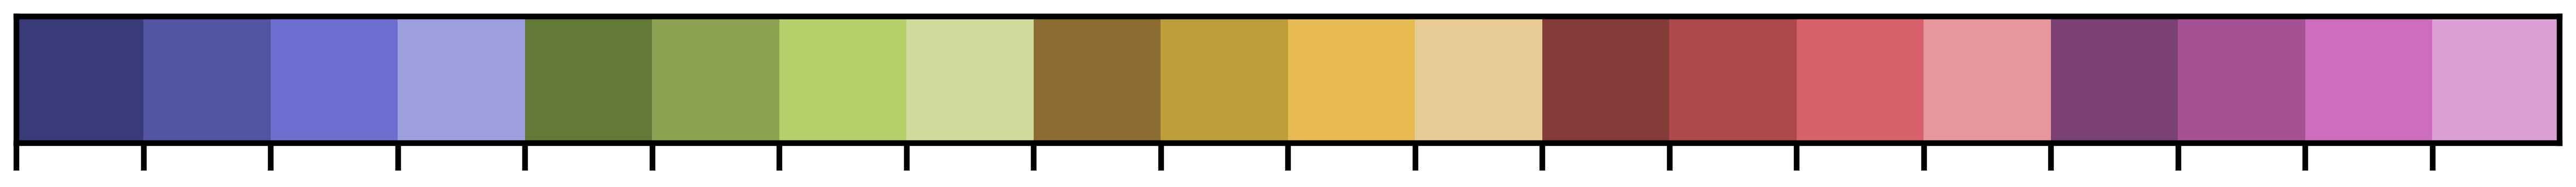

In [109]:
params = {
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial'],
    'font.size': 50,
    'axes.labelsize': 60,
    'axes.titlesize': 60,
    'xtick.labelsize': 50,
    'ytick.labelsize': 50,
    'legend.fontsize': 50,
    'lines.linewidth': 1,
    'figure.figsize': (30, 30),
    'figure.dpi': 300,
    'savefig.dpi': 300,
    'savefig.format': 'svg',
    'savefig.bbox': 'tight'
}
plt.rcParams.update(params)

# Set Seaborn parameters
sns.set_context("poster", font_scale=1.0)
sns.set_palette('tab20b')

# Plot the color palette
sns.palplot(sns.color_palette())

# Choose a color from the palette
my_color = sns.color_palette()[2]

# Show the plot
plt.show()

In [110]:
#define the relevant path to the current batch you wish to parse
project_name='multicategory'
experiment_name='experiment 1'
qualification_method='loose' #or 'loose' or #'none' (will take the entire sample of participants that we have values for)

add_similarity_values=False #this adds the similarity of each image pair in the actuall experiment it takes some time (15 minutes)

model_name='VGG' #the only model we work with atm so dont change
PATH_TO_BATCH=path.Path.cwd().parent.parent.parent / 'projects' / project_name / experiment_name / 'collected data' 
PATH_TO_PROJECT=path.Path.cwd().parent.parent.parent / 'projects' / project_name 
PATH_TO_EXPERIMENT=path.Path.cwd().parent.parent.parent / 'projects' / project_name / experiment_name
PATH_TO_OUTPUTS=path.Path.cwd().parent.parent.parent / 'projects' / project_name / experiment_name / 'figures and outputs' 
if PATH_TO_BATCH.exists():
    print('batch folder found at:\n' ,PATH_TO_BATCH)
else: 
    print('path to batch is non existent:\n',PATH_TO_BATCH)

batch folder found at:
 /Users/edenzohar/Thesis/visual_memory_representation_final/projects/multicategory/experiment 1/collected data


In [111]:


all_directories_paths = [x[0] for x in os.walk(PATH_TO_BATCH) if 'batch' in x[0].split('\\')[-1]]
all_directories_paths = all_directories_paths[0::2]
#delete the following rows once batch 2 is actually filled with data and processed. 
all_directories_paths

['/Users/edenzohar/Thesis/visual_memory_representation_final/projects/multicategory/experiment 1/collected data/pilot_same_day/batch 1',
 '/Users/edenzohar/Thesis/visual_memory_representation_final/projects/multicategory/experiment 1/collected data/pilot_same_day/batch 2',
 '/Users/edenzohar/Thesis/visual_memory_representation_final/projects/multicategory/experiment 1/collected data/pilot_24_hours/batch 1',
 '/Users/edenzohar/Thesis/visual_memory_representation_final/projects/multicategory/experiment 1/collected data/pilot_24_hours/batch 3',
 '/Users/edenzohar/Thesis/visual_memory_representation_final/projects/multicategory/experiment 1/collected data/pilot_24_hours/batch 2']

In [112]:

if qualification_method=='none':
    filename = 'one_line_per_participant_all_info_all_subject_strict.csv' #note that why i do use the "strict" its irrelevant as all_subjects includes all of th em and not just qualified so criterion is irrelevant for this line
elif qualification_method in ['strict','loose']:
    filename = 'one_line_per_participant_all_info_valid_subjects_only_'+qualification_method+'.csv'
else: 
    raise Exception(f'the qualification method choosen {qualification_method} is invalid')

all_valid_subjects = pd.DataFrame([])
for batch in all_directories_paths:
    time_gap = path.Path(batch).parent.name
    PATH_PROCESED = batch/path.Path(filename)
    file = pd.read_csv(PATH_PROCESED,index_col=0)
    file['time_gap'] = time_gap
    file['worker_ID'] = file.index 
    file['batch_number'] = int(path.Path(batch).name.split(' ')[-1])
    
    all_valid_subjects = pd.concat([all_valid_subjects,file])


In [113]:
all_valid_subjects

demo_arrow_rt  demo_arrow_correct  demo_demo_accuracy   
A17K1CHOI773VZ         1.3138                 1.0            0.666667  \
AMHUDJ44HF1ZH          0.7300                 1.0            0.500000   
AGOBQY50VQ7VX          1.1111                 1.0            0.500000   
A23J0G72AUTS1I         1.3290                 1.0            0.333333   
ATPW1MWLW7RBL          1.0961                 1.0            1.000000   
...                       ...                 ...                 ...   
A19AYB3M3IIP51         1.7267                 1.0            0.500000   
A1BQLX0A4W8A8          0.9829                 1.0            0.500000   
A1ABRVTR49OA73         1.5819                 1.0            0.333333   
A39KMTFHRJJASK         1.0032                 1.0            0.666667   
A2J9NFY45NKR2N         0.6736                 1.0            0.500000   

                demo_RT_overall_mean  demo_rating_varience   
A17K1CHOI773VZ              3.189917              1.834848  \
AMHUDJ44HF1ZH               2.712833              4.381780   
AGOBQY50VQ7VX               3.341400              0.516398   
A23J0G72AUTS1I             12.004650              2.338090   
ATPW1MWLW7RBL               2.207467              1.471960   
...                              ...                   ...   
A19AYB3M3IIP51              3.909700              1.211060   
A1BQLX0A4W8A8               6.063083              0.983192   
A1ABRVTR49OA73              4.368667              0.547723   
A39KMTFHRJJASK              2.307517              0.752773   
A2J9NFY45NKR2N              3.696433              0.516398   

                demo_RT_incorrect_mean  demo_RT_correct_mean   
A17K1CHOI773VZ                2.376300              3.596725  \
AMHUDJ44HF1ZH                 2.982133              2.443533   
AGOBQY50VQ7VX                 1.598633              5.084167   
A23J0G72AUTS1I               16.544175              2.925600   
ATPW1MWLW7RBL                      NaN              2.207467   
...                                ...                   ...   
A19AYB3M3IIP51                4.775133              3.044267   
A1BQLX0A4W8A8                 7.433300              4.692867   
A1ABRVTR49OA73                4.043525              5.018950   
A39KMTFHRJJASK                2.027550              2.447500   
A2J9NFY45NKR2N                3.970533              3.422333   

                encoding_arrow_mean_rt  encoding_arrow_accuracy   
A17K1CHOI773VZ                 1.34020                      1.0  \
AMHUDJ44HF1ZH                  0.69402                      1.0   
AGOBQY50VQ7VX                  1.04190                      1.0   
A23J0G72AUTS1I                 1.05904                      1.0   
ATPW1MWLW7RBL                  1.20210                      1.0   
...                                ...                      ...   
A19AYB3M3IIP51                 2.05958                      1.0   
A1BQLX0A4W8A8                  0.89338                      1.0   
A1ABRVTR49OA73                 0.99810                      0.8   
A39KMTFHRJJASK                 1.21280                      1.0   
A2J9NFY45NKR2N                 0.90210                      1.0   

                testing_Test_overall_accuracy  ...  testing_RT_incorrect_mean   
A17K1CHOI773VZ                       0.733333  ...                   7.745687  \
AMHUDJ44HF1ZH                        0.816667  ...                   2.643782   
AGOBQY50VQ7VX                        0.816667  ...                   2.623264   
A23J0G72AUTS1I                       0.783333  ...                   2.319831   
ATPW1MWLW7RBL                        0.800000  ...                   1.952917   
...                                       ...  ...                        ...   
A19AYB3M3IIP51                       0.716667  ...                   5.714918   
A1BQLX0A4W8A8                        0.600000  ...                   3.688963   
A1ABRVTR49OA73                       0.633333  ...                   1.293800   
A39KMTFHRJ

In [114]:
#n_one_week= all_valid_subjects['time_gap'].value_counts()['pilot_one_week']
n_24_hours= all_valid_subjects['time_gap'].value_counts()['pilot_24_hours']
n_same_day= all_valid_subjects['time_gap'].value_counts()['pilot_same_day']

all_valid_subjects['time_gap'].value_counts()

time_gap
pilot_same_day    44
pilot_24_hours    42
Name: count, dtype: int64

lets check if there are duplicate subject names , if so we drop one of there rows 

In [115]:
print(f'there are {len(all_valid_subjects.index) - len(set(all_valid_subjects.index))}, duplicate subjects')

there are 2, duplicate subjects


In [116]:
all_valid_subjects = all_valid_subjects[~((all_valid_subjects['worker_ID'] == 'AEK2SAEL9GG39') & (all_valid_subjects['time_gap'] == 'pilot_24_hours')) ]
all_valid_subjects = all_valid_subjects[~((all_valid_subjects['worker_ID'] == 'A39KMTFHRJJASK') & (all_valid_subjects['time_gap'] == 'pilot_24_hours')) ]

In [117]:
#create long format dataframes for accuracy and rt seperately
rt_df = pd.melt(all_valid_subjects,id_vars=['worker_ID','time_gap'],value_vars=['testing_layer_1_rt','testing_layer_3_rt'],var_name='layer')
accuracy_df = pd.melt(all_valid_subjects,id_vars=['worker_ID','time_gap'],value_vars=['testing_layer_1_accuracy','testing_layer_3_accuracy'],var_name='layer')
rating_df = pd.melt(all_valid_subjects,id_vars=['worker_ID','time_gap'],value_vars=['testing_layer_1_rating','testing_layer_3_rating'],var_name='layer')

In [118]:
all_valid_subjects.to_csv(PATH_TO_OUTPUTS / ('all_data_for_spss_analysis_'+qualification_method+' .csv'),index=False,)

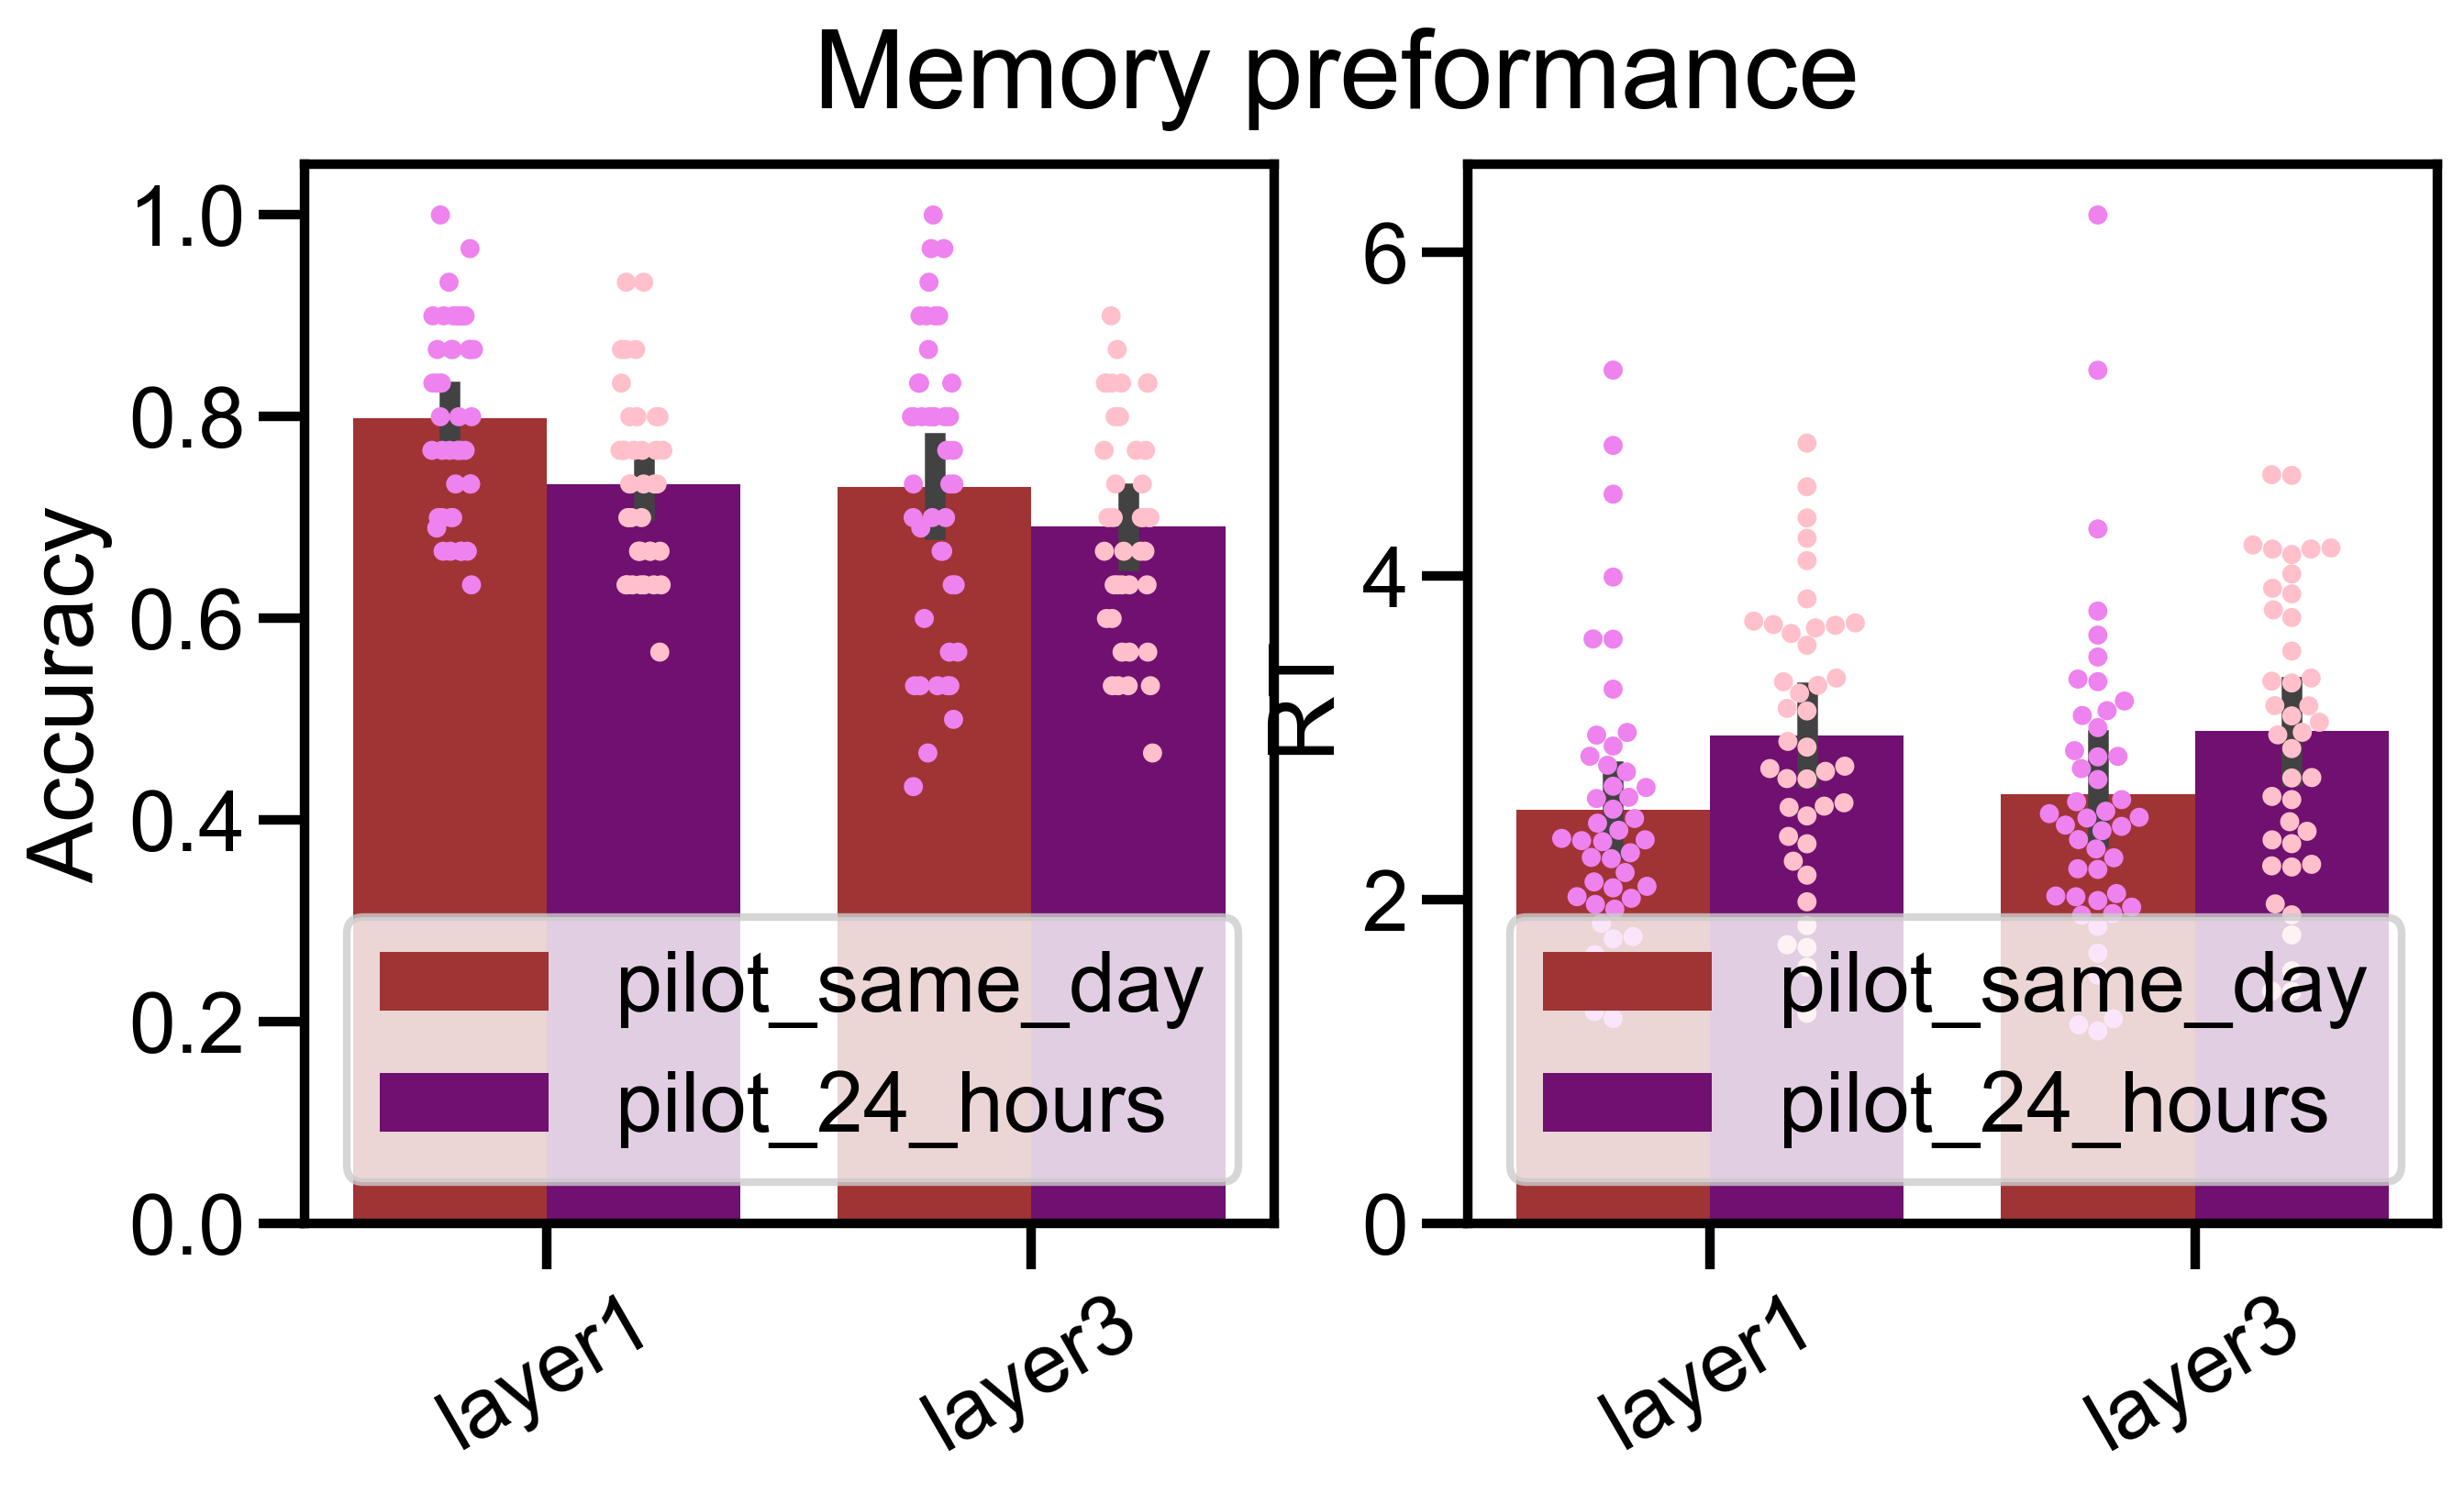

In [119]:


my_order = ['pilot_same_day','pilot_24_hours','pilot_one_week']
my_order = ['pilot_same_day','pilot_24_hours']

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
#sns.barplot(data =accuracy_df, x='layer',y='value',hue='time_gap',ax=axes[0],palette={'pilot_same_day':'firebrick','pilot_24_hours':'purple','pilot_one_week':'green'},hue_order=my_order)
#sns.stripplot(data =accuracy_df, x='layer',y='value',hue='time_gap',ax=axes[0],dodge=True,palette={'pilot_same_day':'violet','pilot_24_hours':'pink','pilot_one_week':'blue'},jitter=True,hue_order=my_order)

sns.barplot(data =accuracy_df, x='layer',y='value',hue='time_gap',ax=axes[0],palette={'pilot_same_day':'firebrick','pilot_24_hours':'purple'},hue_order=my_order)
sns.stripplot(data =accuracy_df, x='layer',y='value',hue='time_gap',ax=axes[0],dodge=True,palette={'pilot_same_day':'violet','pilot_24_hours':'pink'},jitter=True,hue_order=my_order)



axes[0].set_xticklabels(labels=['layer1','layer3'],rotation=30)
axes[0].set_xlabel('')
handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(handles[2:],labels[2:],loc='lower left')
axes[0].set_ylabel('Accuracy')


sns.barplot(data =rt_df, x='layer',y='value',hue='time_gap',ax=axes[1],palette={'pilot_same_day':'firebrick','pilot_24_hours':'purple'},hue_order=my_order)
sns.swarmplot(data =rt_df, x='layer',y='value',hue='time_gap',ax=axes[1],palette={'pilot_same_day':'violet','pilot_24_hours':'pink'},dodge=True,hue_order=my_order)
handles, labels = axes[1].get_legend_handles_labels()
axes[1].set_xticklabels(labels=['layer1','layer3'],rotation=30)
axes[1].legend(handles[2:],labels[2:],loc='lower left')
axes[1].set_ylabel('RT')
axes[1].set_xlabel('')

fig.suptitle('Memory preformance')

fig.savefig(PATH_TO_EXPERIMENT / ('all_batches_bar_graph_grouped_by_layer_'+qualification_method+'.svg'))


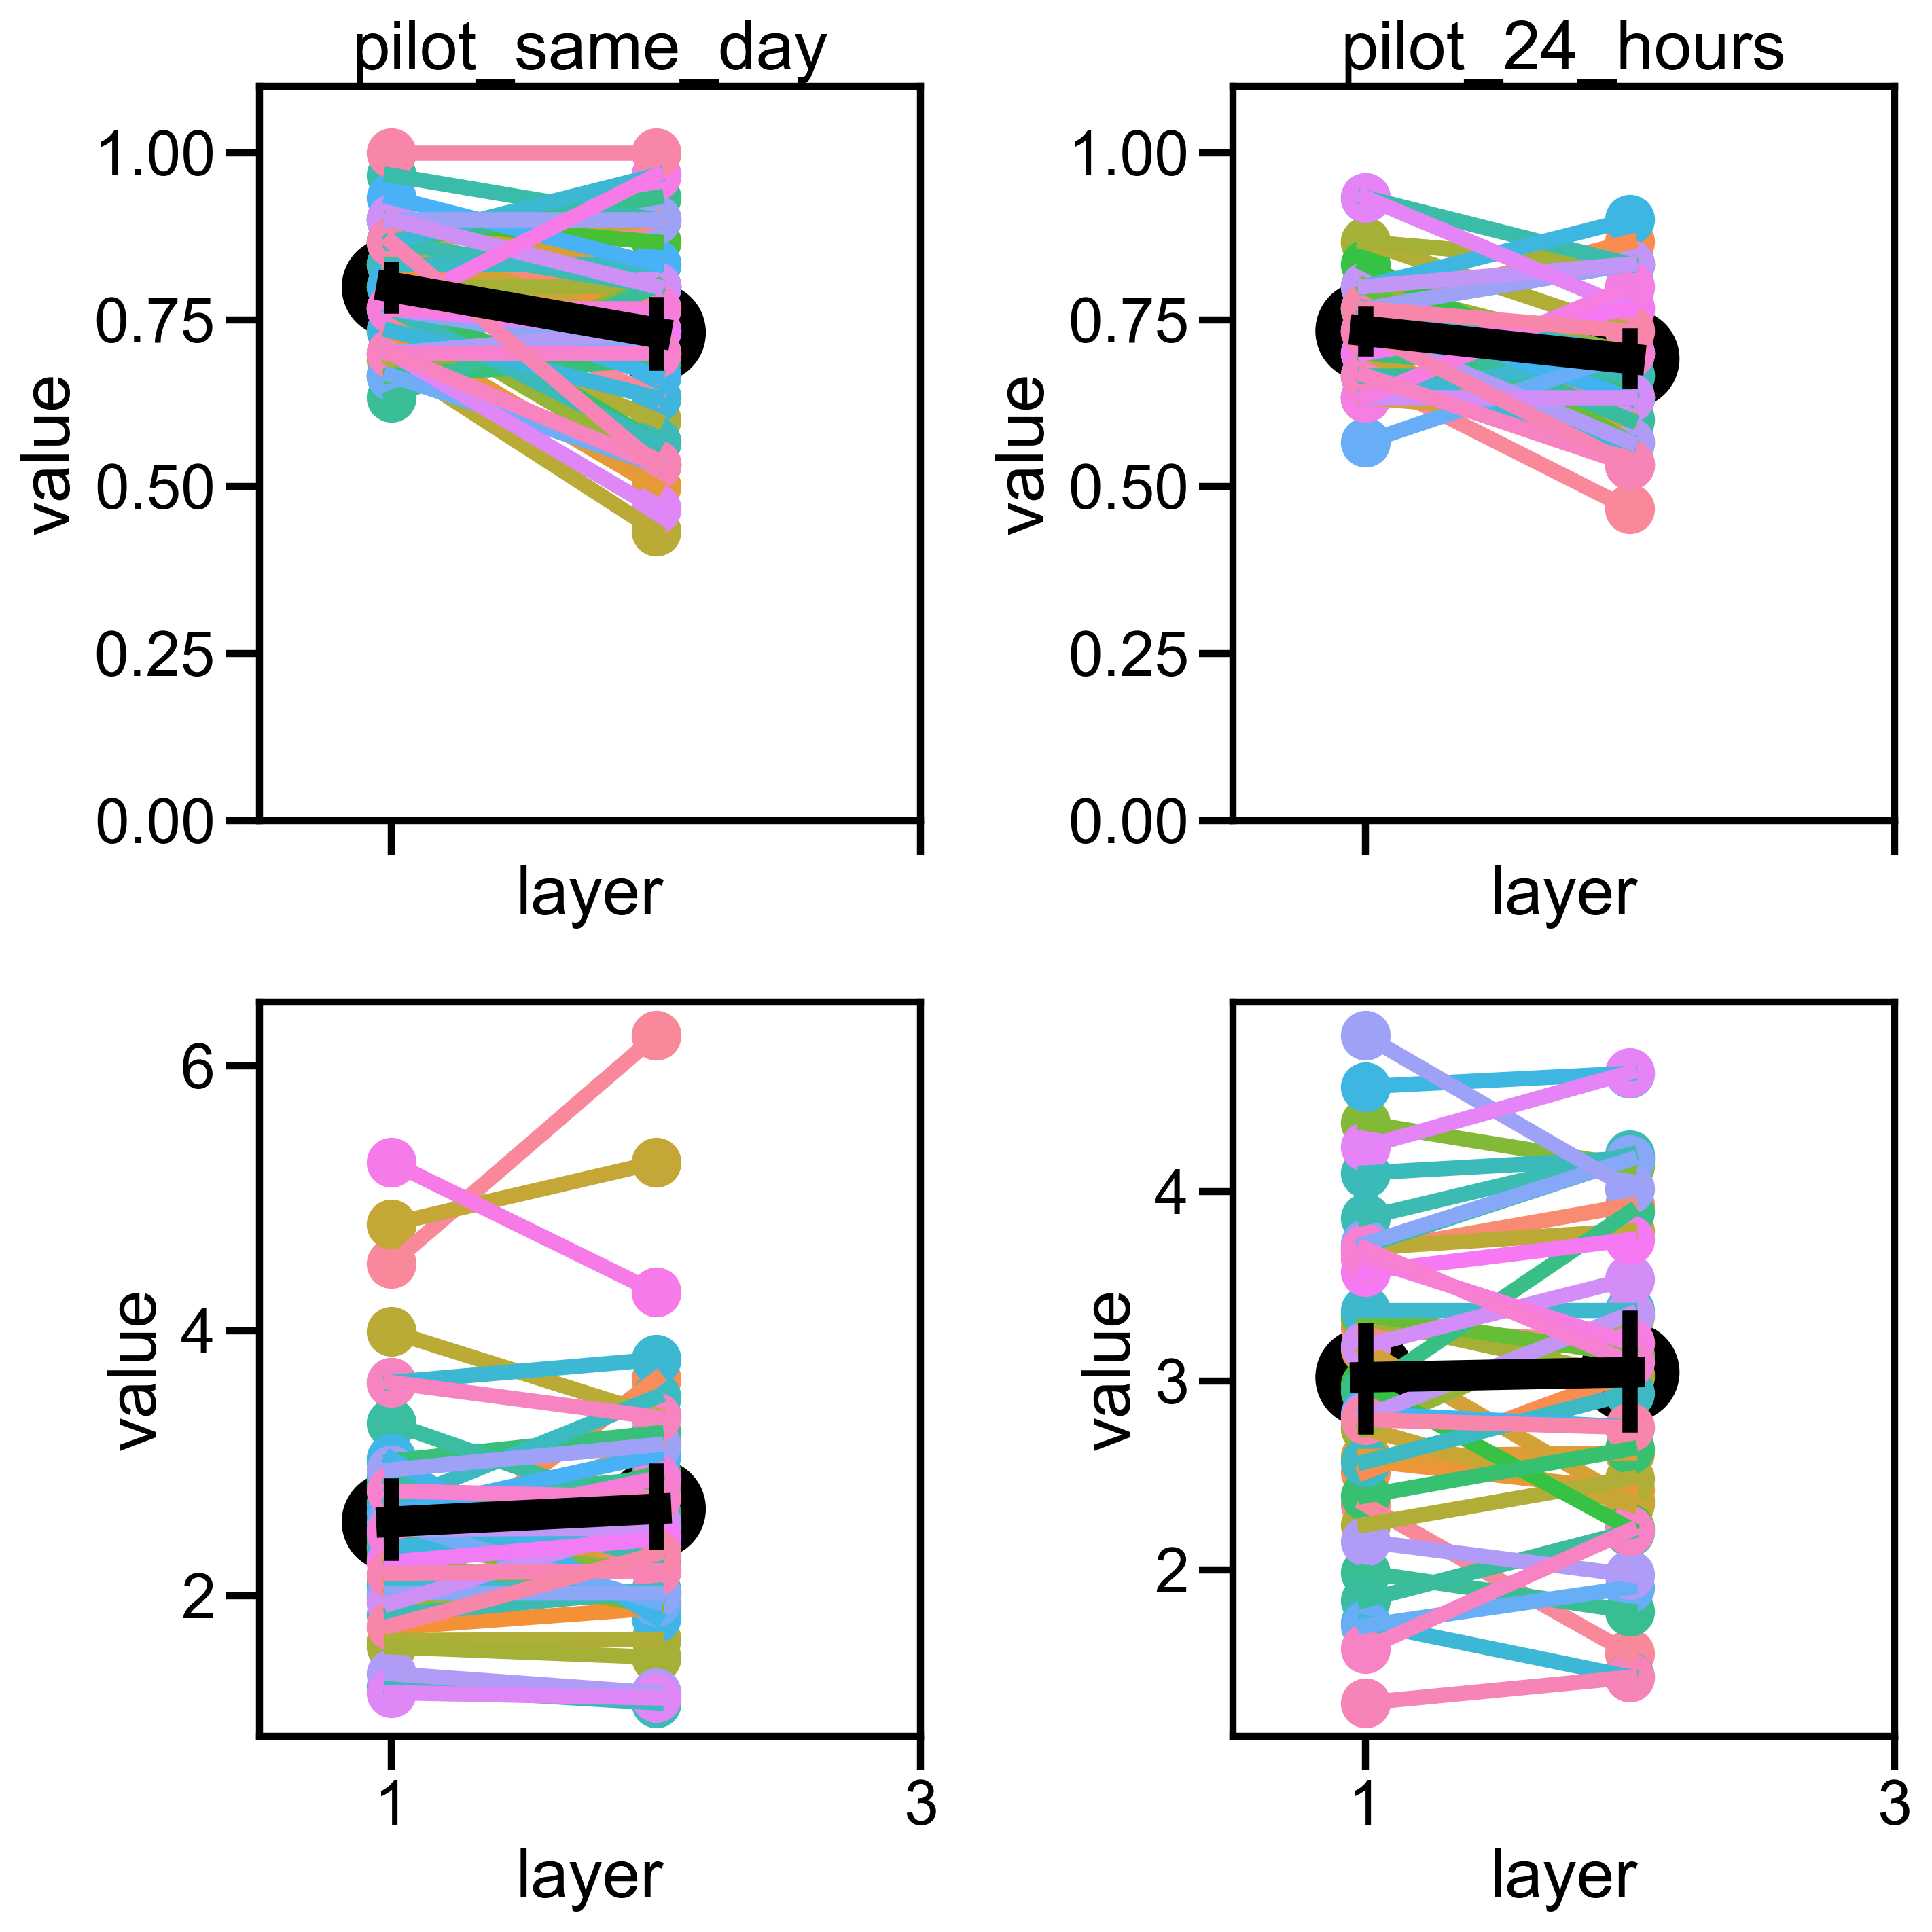

In [120]:
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(10,10),sharex=True,sharey=False)

for i,curtime in enumerate(my_order):
    #accuracy: 
    g=sns.pointplot(data=accuracy_df[accuracy_df['time_gap']==curtime],x='layer', y='value', hue='worker_ID', ax=axes[0,i])
    plt.setp(axes[0,i].lines, zorder=100)
    axes[0,i].set_ylim([0,1.1])
    sns.pointplot(data=accuracy_df[accuracy_df['time_gap']==curtime],x='layer', y='value',ax=axes[0,i],color='black',scale=2)
    plt.setp(axes[0,i].lines, zorder=200)
    axes[0,i].get_legend().remove() 
    axes[0,i].set_title(curtime)
    #rt: 
    g=sns.pointplot(data=rt_df[rt_df['time_gap']==curtime],x='layer', y='value', hue='worker_ID', ax=axes[1,i])
    plt.setp(axes[1,i].lines, zorder=100)
    sns.pointplot(data=rt_df[rt_df['time_gap']==curtime],x='layer', y='value',ax=axes[1,i],color='black',scale=2)
    plt.setp(axes[1,i].lines, zorder=200)
    plt.xticks([0,2],['1','3'])
    axes[1,i].get_legend().remove()

plt.tight_layout()
fig.savefig(PATH_TO_EXPERIMENT / ('line_graphs_per_condition_in_seperate_subplots_'+qualification_method+'.svg'))


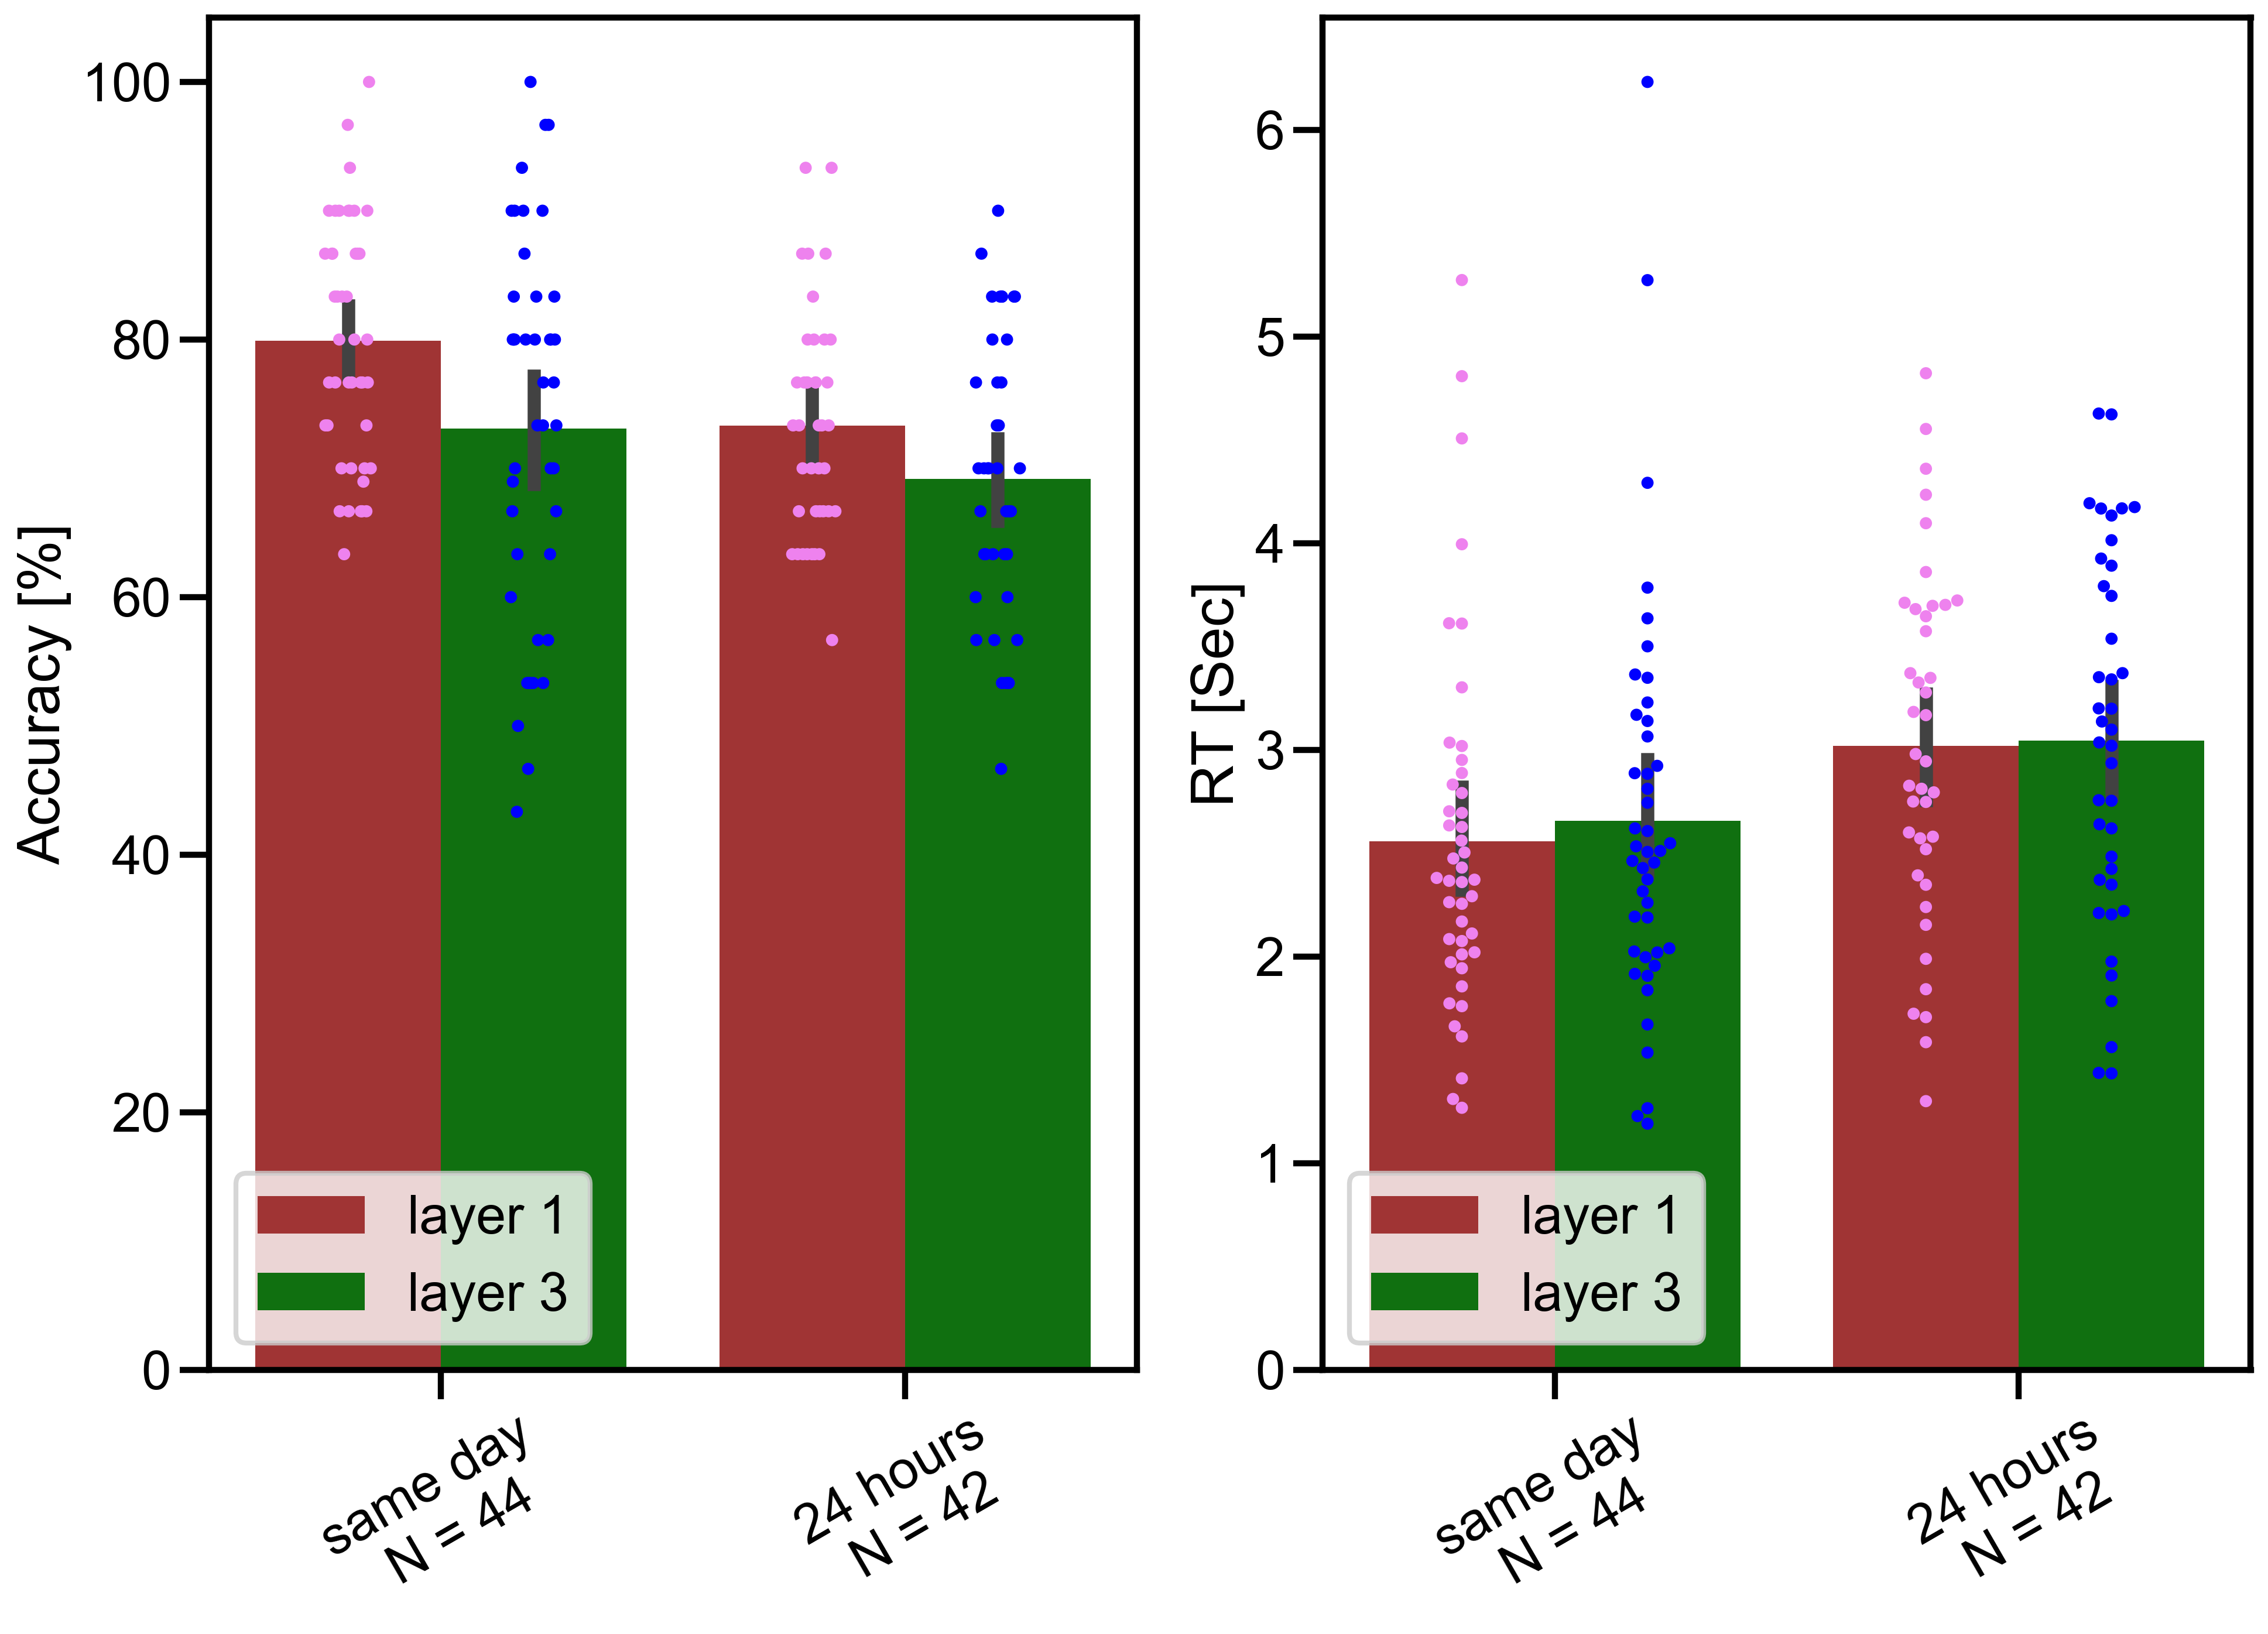

In [121]:
#code for figures:
my_order = ['testing_layer_1_accuracy','testing_layer_3_accuracy']

if accuracy_df['value'].mean()<1:
    accuracy_df['value']=accuracy_df['value']*100

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(15,10),gridspec_kw = {'wspace':0.2, 'hspace':0})
bar = sns.barplot(data =accuracy_df, x='time_gap',y='value',hue='layer',ax=axes[0],palette={'testing_layer_1_accuracy':'firebrick','testing_layer_3_accuracy':'green'},hue_order=my_order,order=['pilot_same_day','pilot_24_hours'])
sns.stripplot(data =accuracy_df, x='time_gap',y='value',hue='layer',ax=axes[0],dodge=True,palette={'testing_layer_1_accuracy':'violet','testing_layer_3_accuracy':'blue'},hue_order=my_order,order=['pilot_same_day','pilot_24_hours'])
# axes[0].set_xticklabels(labels=['pilot_same_day','pilot_24_hours','pilot_one_week'],rotation=30)
axes[0].set_xlabel('')
axes[0].set_xticklabels(labels=[f'same day\n N = {n_same_day}',f'24 hours\n N = {n_24_hours}'],rotation=30)
handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(handles[2:],['layer 1','layer 3'],loc='lower left')
axes[0].set_ylabel('Accuracy [%]')



my_order = ['testing_layer_1_rt','testing_layer_3_rt']

sns.barplot(data =rt_df, x='time_gap',y='value',hue='layer',ax=axes[1],palette={'testing_layer_1_rt':'firebrick','testing_layer_3_rt':'green'},hue_order=my_order,order=['pilot_same_day','pilot_24_hours'])
sns.swarmplot(data =rt_df,x='time_gap',y='value',hue='layer',ax=axes[1],palette={'testing_layer_1_rt':'violet','testing_layer_3_rt':'blue'},dodge=True,hue_order=my_order,order=['pilot_same_day','pilot_24_hours'])
handles, labels = axes[1].get_legend_handles_labels()
axes[1].set_xticklabels(labels=[f'same day\n N = {n_same_day}',f'24 hours\n N = {n_24_hours}'],rotation=30)
axes[1].legend(handles[2:],['layer 1','layer 3'],loc='lower left')
axes[1].set_ylabel('RT [Sec]')
axes[1].set_xlabel('')

#fig.tight_layout()
#fig.suptitle('Memory preformance')
fig.savefig(PATH_TO_EXPERIMENT / ('all_batches_bar_graph_grouped_by_timegap_'+qualification_method+'.svg'))


In [122]:
# lets look at the std 
for layer in np.unique(accuracy_df['layer'].values):
    curr_df = accuracy_df[accuracy_df['layer'] == layer]
    curr_vals = curr_df['value']
    layer_num = layer.split('_')[-2]
    print(f'the std for layer {layer_num} is {curr_vals.values.std()}')

    for time in np.unique(curr_df['time_gap'].values):

        curr_vals_time = curr_df[curr_df['time_gap'] == time]['value'] 
        print(f'the std for layer {layer_num} and time gap: {time} is {curr_vals_time.values.std()}')



the std for layer 1 is 9.541413292946332
the std for layer 1 and time gap: pilot_24_hours is 8.628119403696527
the std for layer 1 and time gap: pilot_same_day is 9.251253806223627
the std for layer 3 is 13.112676906603692
the std for layer 3 and time gap: pilot_24_hours is 10.87172683820029
the std for layer 3 and time gap: pilot_same_day is 14.61170788877839


## this section creates a long dataformat for all participants from the 3 possible time gaps
### cells running additional analyses on this long format: 
* checks how position in the encoding stream effects performence 
* creates a multi level logistic regression that examine the contribution of the similarity levels between each pair across the 3 defined levels



In [123]:
#read data from all time gaps: 

all_participants_results_files=list(set([sub_path.parent.parent for sub_path in list(PATH_TO_EXPERIMENT.rglob('*.csv')) if '-' in sub_path.name]))
#remove the sameday batches that are not 6 or 7
all_participants_batch_locations= all_participants_results_files
all_participants_batch_locations

all_participants_batch_locations 

[PosixPath('/Users/edenzohar/Thesis/visual_memory_representation_final/projects/multicategory/experiment 1/collected data/pilot_same_day/batch 2'),
 PosixPath('/Users/edenzohar/Thesis/visual_memory_representation_final/projects/multicategory/experiment 1/collected data/pilot_24_hours/batch 1'),
 PosixPath('/Users/edenzohar/Thesis/visual_memory_representation_final/projects/multicategory/experiment 1/collected data/pilot_same_day/batch 1'),
 PosixPath('/Users/edenzohar/Thesis/visual_memory_representation_final/projects/multicategory/experiment 1/collected data/pilot_24_hours/batch 3'),
 PosixPath('/Users/edenzohar/Thesis/visual_memory_representation_final/projects/multicategory/experiment 1/collected data/pilot_24_hours/batch 2')]

In [124]:
#create a long format encoding and test dataframes: 
all_subjects_encoding_long_format_df=pd.DataFrame()
all_subjects_test_long_format_df=pd.DataFrame()
for cur_batch in all_participants_batch_locations:
    cur_sub_encoding_df=pd.read_csv(cur_batch / 'all_subjects_encoding_df.csv')
    cur_sub_test_df=pd.read_csv(cur_batch / 'all_subjects_test_df.csv')

    cur_sub_encoding_df['time_gap']=cur_batch.parent.name
    cur_sub_test_df['time_gap']=cur_batch.parent.name

    all_subjects_encoding_long_format_df=pd.concat([all_subjects_encoding_long_format_df,cur_sub_encoding_df],axis=0)
    all_subjects_test_long_format_df=pd.concat([all_subjects_test_long_format_df,cur_sub_test_df],axis=0)


all_valid_test_df_long_format=pd.DataFrame()
all_valid_encoding_df_long_format=pd.DataFrame()

for cur_sub in all_valid_subjects.index:
    #some subject names are the full length name to thier csv: if this is the case, change it to take only the amazong worker id: 
    cur_sub_encoding=all_subjects_encoding_long_format_df[all_subjects_encoding_long_format_df['subject']==cur_sub]
    cur_sub_test=all_subjects_test_long_format_df[all_subjects_test_long_format_df['subject']==cur_sub]
    all_valid_encoding_df_long_format=pd.concat([all_valid_encoding_df_long_format,cur_sub_encoding],axis=0)
    all_valid_test_df_long_format=pd.concat([all_valid_test_df_long_format,cur_sub_test],axis=0)

print('only valid participants counts:')
print(all_valid_test_df_long_format['time_gap'].value_counts())
print('all participants counts:')
print(all_subjects_test_long_format_df['time_gap'].value_counts())


only valid participants counts:
time_gap
pilot_same_day    2640
pilot_24_hours    2520
Name: count, dtype: int64
all participants counts:
time_gap
pilot_same_day    5280
pilot_24_hours    4800
Name: count, dtype: int64


In [125]:
"""
#create a dataframe which allows the analysis of encoding position: 

images_position_accuracy_df=pd.DataFrame(columns=['img_name','target_layer','distractor_layer','serial_position_in_encoding','is_correct','viewed_by_encoding','viewed_by_test','distractor_side','time_gap'])
target_images=set(all_valid_encoding_df_long_format['target'].unique())-{'left.jpg','right.jpg'}
for cur_img in target_images:
     
    img_df=pd.DataFrame(columns=['img_name','target_layer','distractor_layer','serial_position_in_encoding','is_correct','viewed_by_encoding','viewed_by_test','distractor_side','time_gap'])
    cur_encoding_img_info=all_valid_encoding_df_long_format[all_valid_encoding_df_long_format['target']==cur_img]
    img_df['target_layer']=cur_encoding_img_info['layer'].values
    img_df['serial_position_in_encoding']=cur_encoding_img_info['trials.thisTrialN'].values
    img_df['viewed_by_encoding']= cur_encoding_img_info['subject'].values
    img_df['img_name']=cur_img
    img_df['time_gap']=cur_encoding_img_info['time_gap'].values
    #get from test: 
    cur_test_img_info=all_valid_test_df_long_format[(all_valid_test_df_long_format['image1']==cur_img) | (all_valid_test_df_long_format['image2']==cur_img)]

    img_df['distractor_layer']=cur_test_img_info['layer'].values
    img_df['is_correct']=cur_test_img_info['test_test_response.corr'].values
    img_df['distractor_side']=cur_test_img_info['correct'].values
    img_df['viewed_by_test']=cur_test_img_info['subject'].values

    images_position_accuracy_df=pd.concat([images_position_accuracy_df,img_df],axis=0)
#remember to change left to right and right to left: """


"\n#create a dataframe which allows the analysis of encoding position: \n\nimages_position_accuracy_df=pd.DataFrame(columns=['img_name','target_layer','distractor_layer','serial_position_in_encoding','is_correct','viewed_by_encoding','viewed_by_test','distractor_side','time_gap'])\ntarget_images=set(all_valid_encoding_df_long_format['target'].unique())-{'left.jpg','right.jpg'}\nfor cur_img in target_images:\n     \n    img_df=pd.DataFrame(columns=['img_name','target_layer','distractor_layer','serial_position_in_encoding','is_correct','viewed_by_encoding','viewed_by_test','distractor_side','time_gap'])\n    cur_encoding_img_info=all_valid_encoding_df_long_format[all_valid_encoding_df_long_format['target']==cur_img]\n    img_df['target_layer']=cur_encoding_img_info['layer'].values\n    img_df['serial_position_in_encoding']=cur_encoding_img_info['trials.thisTrialN'].values\n    img_df['viewed_by_encoding']= cur_encoding_img_info['subject'].values\n    img_df['img_name']=cur_img\n    img_d

In [126]:
"""#create a plot for each time gap, X is target image serial position in encoding, y is the average accuracy (this analysis probably needs alot of data)
grouped_df=images_position_accuracy_df.groupby(['time_gap','distractor_layer','serial_position_in_encoding']).aggregate({'is_correct':['mean','std']})
fig,axes=plt.subplots(nrows=3,ncols=1,figsize=(20,10),sharex=True,sharey=True)
for i,cur_timegap in enumerate(['pilot_same_day','pilot_24_hours','pilot_one_week']):
    grouped_df.loc[cur_timegap, 1.0]['is_correct', 'mean'].plot(ax=axes[i],color='r')
    grouped_df.loc[cur_timegap, 2.0]['is_correct', 'mean'].plot(ax=axes[i],color='b')
    grouped_df.loc[cur_timegap, 3.0]['is_correct', 'mean'].plot(ax=axes[i],color='g')
    axes[i].set_title(cur_timegap)
    axes[i].set_xlabel('encoding serial position')
    axes[i].set_ylabel('accuracy [Mean]')"""



"#create a plot for each time gap, X is target image serial position in encoding, y is the average accuracy (this analysis probably needs alot of data)\ngrouped_df=images_position_accuracy_df.groupby(['time_gap','distractor_layer','serial_position_in_encoding']).aggregate({'is_correct':['mean','std']})\nfig,axes=plt.subplots(nrows=3,ncols=1,figsize=(20,10),sharex=True,sharey=True)\nfor i,cur_timegap in enumerate(['pilot_same_day','pilot_24_hours','pilot_one_week']):\n    grouped_df.loc[cur_timegap, 1.0]['is_correct', 'mean'].plot(ax=axes[i],color='r')\n    grouped_df.loc[cur_timegap, 2.0]['is_correct', 'mean'].plot(ax=axes[i],color='b')\n    grouped_df.loc[cur_timegap, 3.0]['is_correct', 'mean'].plot(ax=axes[i],color='g')\n    axes[i].set_title(cur_timegap)\n    axes[i].set_xlabel('encoding serial position')\n    axes[i].set_ylabel('accuracy [Mean]')"

In [127]:
#here we do some statistics: mixed effects (1 between (time gap - 3 levels) and 1 within factors (layer representation - 3 levels)) and some assumption checks
import pingouin as pg

#check for sphercity assumption" 
print('\n---sphericity assumption----------')
print(pg.sphericity(data=accuracy_df, dv='value', subject='worker_ID', within='layer')[-1])

#homoscedasticity
print('\n---homoscedasticity assumption---')
for layer_val in accuracy_df['layer'].unique():
    print(f'layer: {layer_val}:')
    print(pg.homoscedasticity(accuracy_df[accuracy_df['layer']==layer_val], dv='value', group='time_gap'))



#assumption of normality: 
print('\n-----normality assumption-------')
accuracy_df['factor_comb']=accuracy_df["layer"] + '_'+accuracy_df["time_gap"]
print(pg.normality(accuracy_df, dv='value', group='factor_comb'))


print('\n---------anova results----------')

print(pg.mixed_anova(dv='value', between='time_gap', within='layer', subject='worker_ID', data=accuracy_df))




---sphericity assumption----------
1.0

---homoscedasticity assumption---
layer: testing_layer_1_accuracy:
               W      pval  equal_var
levene  0.828634  0.365336       True
layer: testing_layer_3_accuracy:
               W      pval  equal_var
levene  3.959431  0.049942      False

-----normality assumption-------
                                                W      pval  normal
factor_comb                                                        
testing_layer_1_accuracy_pilot_same_day  0.955619  0.089200    True
testing_layer_1_accuracy_pilot_24_hours  0.951926  0.088344    True
testing_layer_3_accuracy_pilot_same_day  0.964448  0.190466    True
testing_layer_3_accuracy_pilot_24_hours  0.965178  0.250670    True

---------anova results----------
        Source           SS  DF1  DF2           MS          F     p-unc   
0     time_gap  1151.324767    1   82  1151.324767   6.166560  0.015057  \
1        layer  1296.296296    1   82  1296.296296  19.133037  0.000036   
2  Int

In [128]:
accuracy_df['worker_ID'].value_counts()

worker_ID
A17K1CHOI773VZ    2
A2IQ0QCTQ3KWLT    2
AW07POT8ABE05     2
AC01SVLHOB6HN     2
A1969Q0R4Y0E3J    2
                 ..
AZNIEFUIVB2H0     2
A1VXAJIELTYK0     2
A3CGQOJC28OVGN    2
A23KAJRDVCVGOE    2
A2J9NFY45NKR2N    2
Name: count, Length: 84, dtype: int64

# RATING ANALYSIS 

In [129]:

#check for sphercity assumption" 
print('\n---sphericity assumption----------')
print(pg.sphericity(data=rating_df, dv='value', subject='worker_ID', within='layer')[-1])

#homoscedasticity
print('\n---homoscedasticity assumption---')
for layer_val in rating_df['layer'].unique():
    print(f'layer: {layer_val}:')
    print(pg.homoscedasticity(rating_df[rating_df['layer']==layer_val], dv='value', group='time_gap'))



#assumption of normality: 
print('\n-----normality assumption-------')
rating_df['factor_comb']=rating_df["layer"] + '_'+rating_df["time_gap"]
print(pg.normality(rating_df, dv='value', group='factor_comb'))


print('\n---------anova results----------')

print(pg.mixed_anova(dv='value', between='time_gap', within='layer', subject='worker_ID', data=rating_df))



---sphericity assumption----------
1.0

---homoscedasticity assumption---
layer: testing_layer_1_rating:
               W      pval  equal_var
levene  0.027924  0.867699       True
layer: testing_layer_3_rating:
               W      pval  equal_var
levene  0.062959  0.802506       True

-----normality assumption-------
                                              W      pval  normal
factor_comb                                                      
testing_layer_1_rating_pilot_same_day  0.970922  0.326092    True
testing_layer_1_rating_pilot_24_hours  0.911057  0.004075   False
testing_layer_3_rating_pilot_same_day  0.965896  0.215282    True
testing_layer_3_rating_pilot_24_hours  0.874093  0.000366   False

---------anova results----------
        Source        SS  DF1  DF2        MS          F         p-unc   
0     time_gap  0.902671    1   82  0.902671   0.202544  6.538631e-01  \
1        layer  7.774996    1   82  7.774996  46.244853  1.560232e-09   
2  Interaction  0.102931    

Text(0, 0.5, 'Rating')

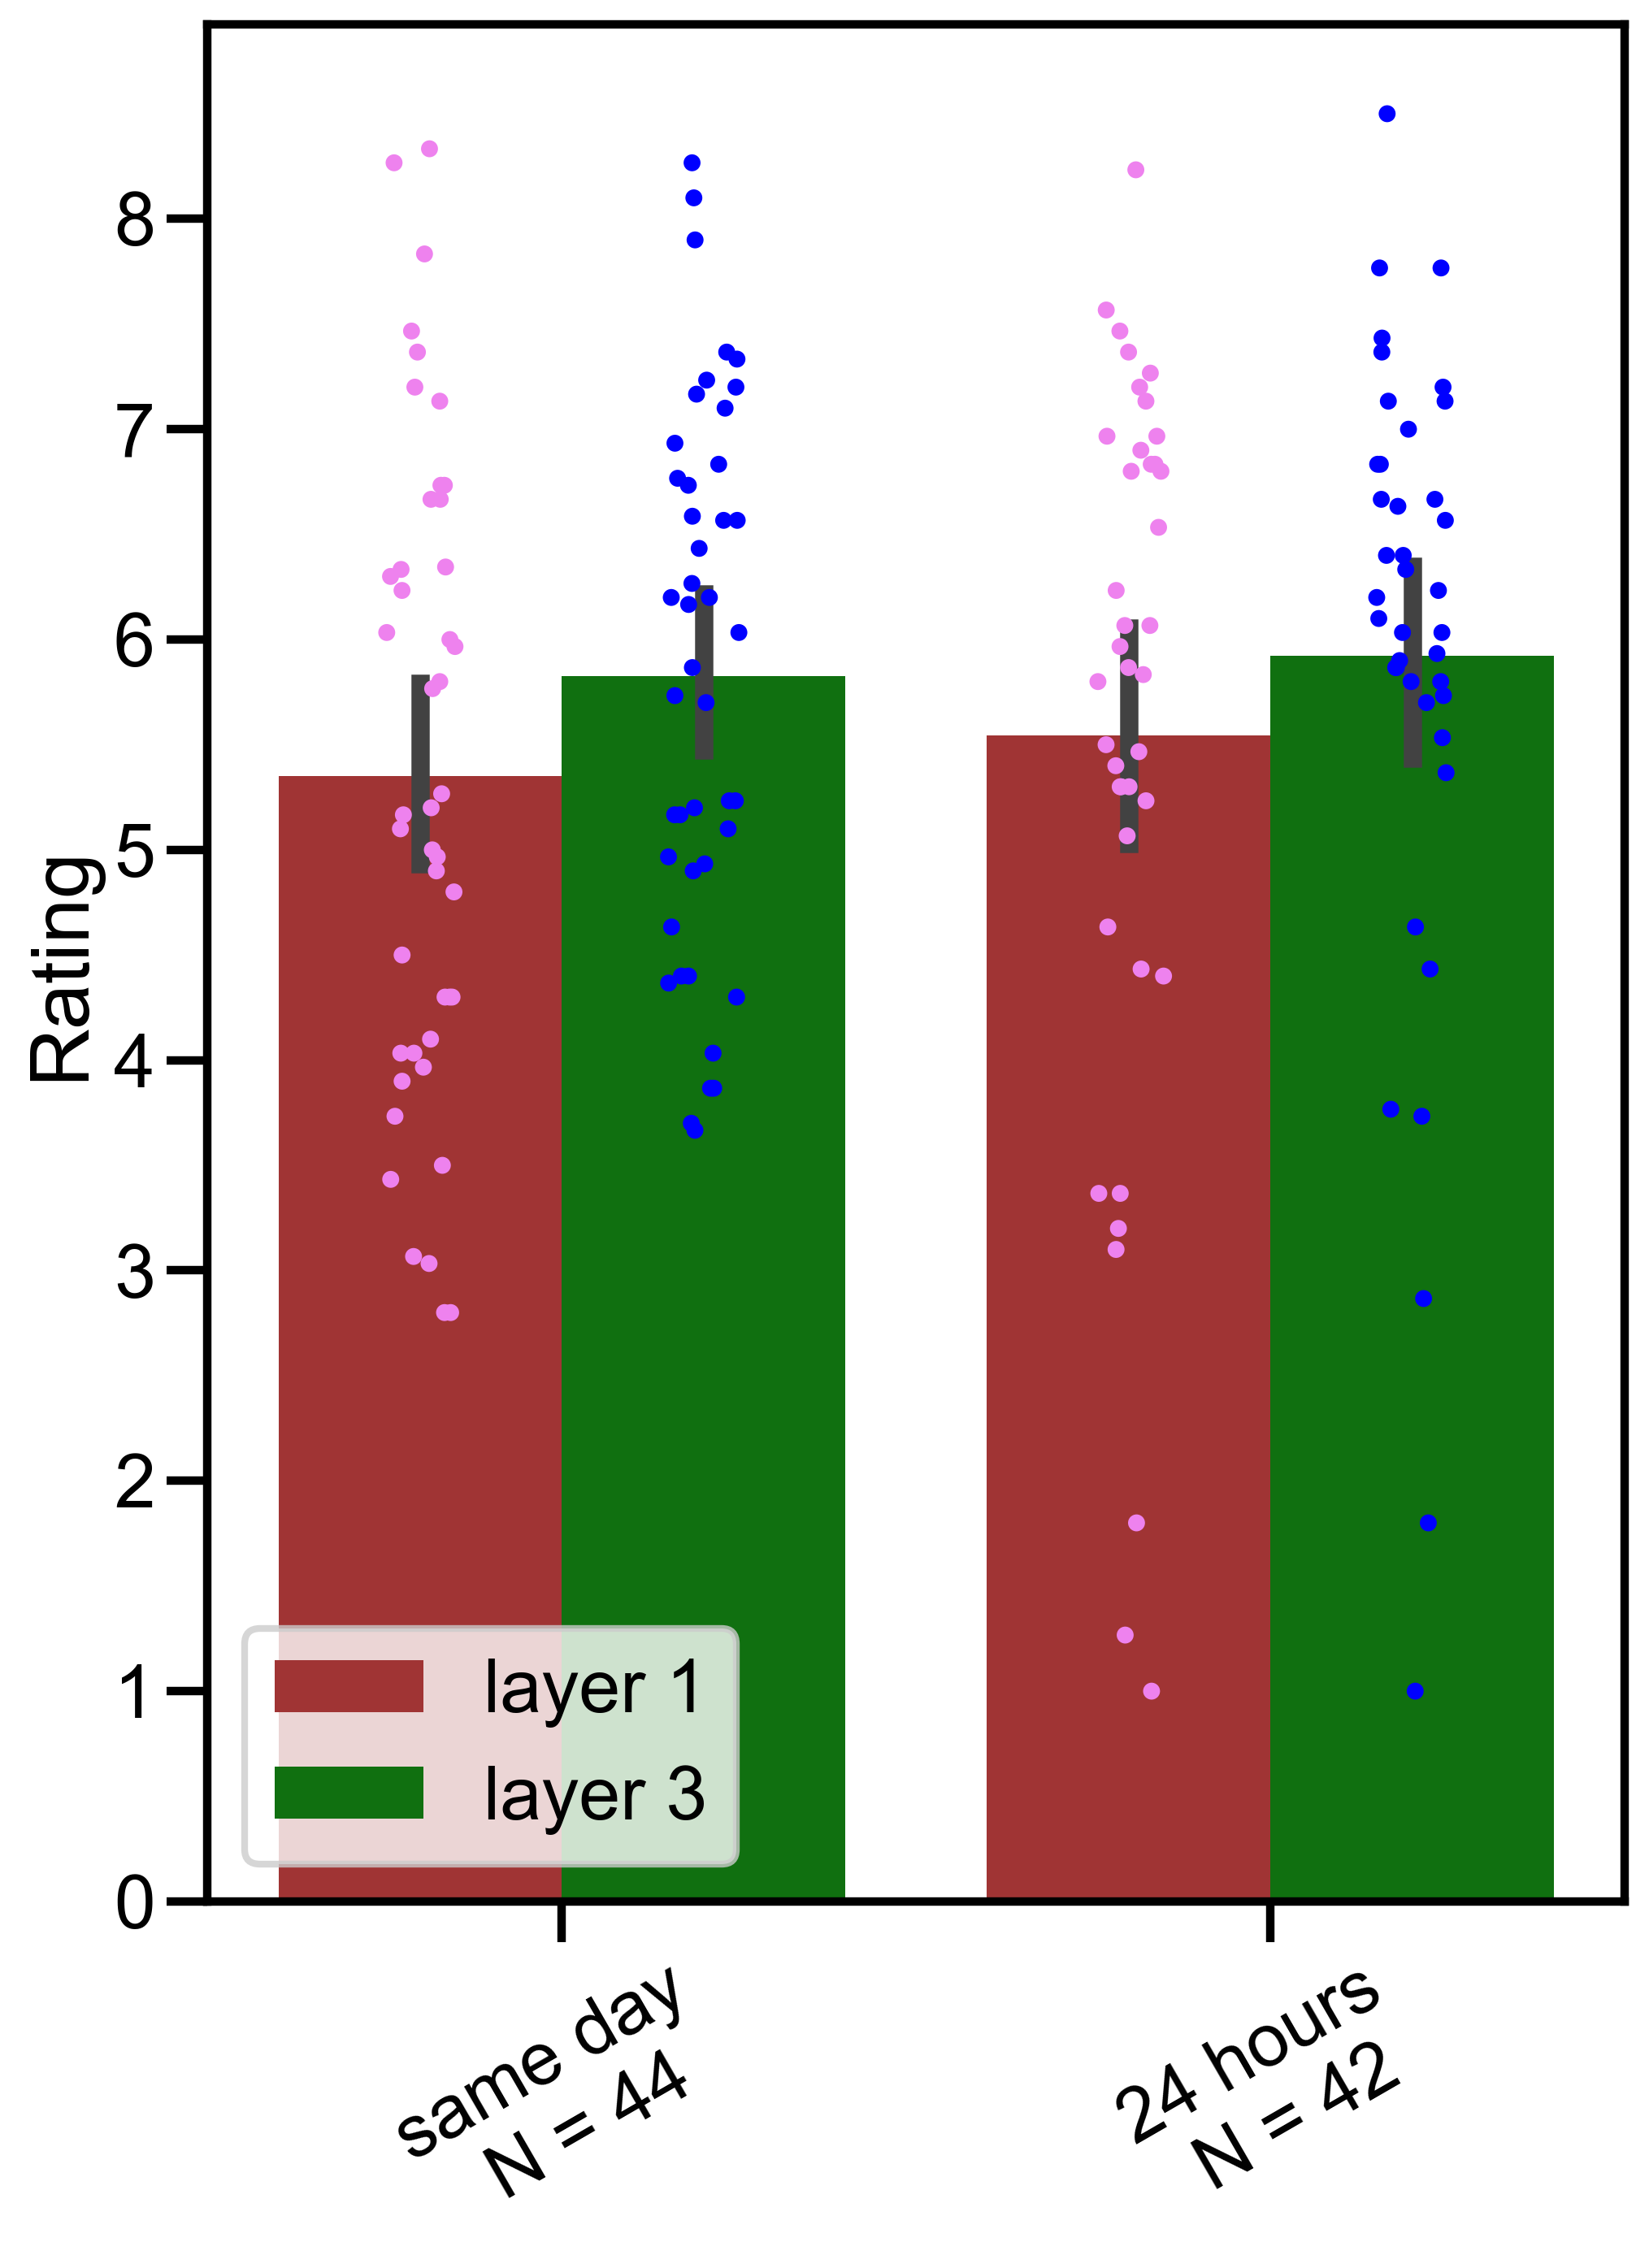

In [130]:
my_order = ['testing_layer_1_rating','testing_layer_3_rating']

fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(7.5,10),gridspec_kw = {'wspace':0.2, 'hspace':0})
bar = sns.barplot(data =rating_df, x='time_gap',y='value',hue='layer',ax=axes,palette={'testing_layer_1_rating':'firebrick','testing_layer_3_rating':'green'},hue_order=my_order,order=['pilot_same_day','pilot_24_hours'])
sns.stripplot(data =rating_df, x='time_gap',y='value',hue='layer',ax=axes,dodge=True,palette={'testing_layer_1_rating':'violet','testing_layer_3_rating':'blue'},hue_order=my_order,order=['pilot_same_day','pilot_24_hours'])
# axes[0].set_xticklabels(labels=['pilot_same_day','pilot_24_hours','pilot_one_week'],rotation=30)
axes.set_xlabel('')
axes.set_xticklabels(labels=[f'same day\n N = {n_same_day}',f'24 hours\n N = {n_24_hours}'],rotation=30)
handles, labels = axes.get_legend_handles_labels()
axes.legend(handles[2:],['layer 1','layer 3'],loc='lower left')
axes.set_ylabel('Rating')



In [131]:
simillarity_df = pd.DataFrame([])
for cat in ['badlands','bridge','golf_course','highway','mountain','playground']:
    filename = f'similarity_between_pairs_VGG{cat}.csv'
    PATH_TO_PROJECT = PATH_TO_BATCH.parent.parent
    cur_similarity_df = pd.read_csv(PATH_TO_PROJECT/filename)
    simillarity_df = pd.concat([simillarity_df,cur_similarity_df])


simillarity_df['image1'] = simillarity_df['image1'].str.replace('.pkl','.jpg')
simillarity_df['image2'] = simillarity_df['image2'].str.replace('.pkl','.jpg')


# sort the values in each row
temp1 = simillarity_df[['image1', 'image2']].apply(lambda x: sorted(x)[0], axis=1)
temp2 = simillarity_df[['image1', 'image2']].apply(lambda x: sorted(x)[1], axis=1)
simillarity_df['image1']=temp1
simillarity_df['image2']=temp2


temp1 = all_valid_test_df_long_format[['image1', 'image2']].apply(lambda x: sorted(x)[0], axis=1)
temp2 = all_valid_test_df_long_format[['image1', 'image2']].apply(lambda x: sorted(x)[1], axis=1)
all_valid_test_df_long_format['image1']=temp1
all_valid_test_df_long_format['image2']=temp2


all_subjects_test_df=pd.merge(simillarity_df, all_valid_test_df_long_format, on=['image1', 'image2'],how='right')


all_subjects_test_df = all_subjects_test_df.rename(columns={"test_test_response.corr": "corr", "bar_2.response": "bar_2"})
all_subjects_test_df['mean_sim']=all_subjects_test_df[[col for col in all_subjects_test_df.columns if 'level_' in col]].mean(axis=1)
all_subjects_test_df['mean_sim_0_6']=all_subjects_test_df[['level_0','level_6']].mean(axis=1)

In [132]:
all_subjects_test_df

image1               image2   level_0   level_1   level_2   
0        highway_122.jpg      highway_209.jpg  0.270972  0.178226  0.125231  \
1          bridge_17.jpg       bridge_172.jpg  0.511052  0.333230  0.215984   
2       badlands_113.jpg     badlands_203.jpg  0.453793  0.356467  0.284037   
3     playground_205.jpg   playground_219.jpg  0.329943  0.284396  0.176942   
4     golf_course_26.jpg  golf_course_331.jpg  0.405576  0.322834  0.252274   
...                  ...                  ...       ...       ...       ...   
5155  playground_205.jpg   playground_219.jpg  0.329943  0.284396  0.176942   
5156      bridge_202.jpg        bridge_38.jpg  0.240852  0.220152  0.154202   
5157  playground_215.jpg   playground_257.jpg  0.218854  0.194496  0.149581   
5158     badlands_52.jpg      badlands_63.jpg  0.337109  0.297394  0.242920   
5159    badlands_113.jpg     badlands_225.jpg  0.549627  0.427439  0.326933   

       level_3   level_4   level_5   level_6 model  ... trials_2.thisRepN   
0     0.095615  0.157327  0.590345  0.712342   VGG  ...               0.0  \
1     0.126730  0.054675  0.164255  0.137697   VGG  ...               0.0   
2     0.280624  0.395984  0.785356  0.853390   VGG  ...               0.0   
3     0.096481  0.077159  0.381301  0.605077   VGG  ...               0.0   
4     0.286320  0.389074  0.710798  0.733175   VGG  ...               0.0   
...        ...       ...       ...       ...   ...  ...               ...   
5155  0.096481  0.077159  0.381301  0.605077   VGG  ...               0.0   
5156  0.109590  0.267767  0.595506  0.697118   VGG  ...               0.0   
5157  0.110682  0.112005  0.319693  0.443202   VGG  ...               0.0   
5158  0.277485  0.354078  0.682525  0.775086   VGG  ...               0.0   
5159  0.276876  0.252547  0.465177  0.378773   VGG  ...               0.0   

     trials_2.thisTrialN  trials_2.thisN  trials_2.thisIndex trials_2.ran   
0                    0.0             0.0                 0.0          1.0  \
1                    1.0             1.0                 1.0          1.0   
2                    2.0             2.0                 2.0          1.0   
3                    3.0             3.0                 3.0          1.0   
4                    4.0             4.0                 4.0          1.0   
...                  ...             ...                 ...          ...   
5155                55.0            55.0                55.0          1.0   
5156                56.0            56.0                56.0          1.0   
5157                57.0            57.0                57.0          1.0   
5158                58.0            58.0                58.0          1.0   
5159                59.0            59.0                59.0          1.0   

     bar_2         subject        time_gap  mean_sim  mean_sim_0_6  
0      8.0  A17K1CHOI773VZ  pilot_same_day  0.304294      0.491657  
1      2.0  A17K1CHOI773VZ  pilot_same_day  0.220518      0.324374  
2      7.0  A17K1CHOI773VZ  pilot_same_day  0.487093      0.653591  
3      5.0  A17K1CHOI773VZ  pilot_same_day  0.278757      0.467510  
4      6.0  A17K1CHOI773VZ  pilot_same_day  0.442864      0.569375  
...    ...             ...             ...       ...           ...  
5155   7.0  A2J9NFY45NKR2N  pilot_24_hours  0.278757      0.467510  
5156   7.0  A2J9NFY45NKR2N  pilot_24_hours  0.326455      0.468985  
5157   6.0  A2J9NFY45NKR2N  pilot_24_hours  0.221216      0.331028  
5158   6.0  A2J9NFY45NKR2N  pilot_24_hours  0.423800      0.556098  
5159   8.0  A2J9NFY45NKR2N  pilot_24_hours  0.382482      0.464200  

[5160 rows x 28 columns]

In [133]:
df_24_hours = all_subjects_test_df[all_subjects_test_df['time_gap'] == 'pilot_24_hours']
df_same_day = all_subjects_test_df[all_subjects_test_df['time_gap'] == 'pilot_same_day']

df_24_hours_grouped = df_24_hours.groupby(['image1','image2']).aggregate({'bar_2':'mean','level_0':'mean','level_6':'mean','mean_sim':'mean','corr':'mean'})
df_same_day_grouped = df_same_day.groupby(['image1','image2']).aggregate({'bar_2':'mean','level_0':'mean','level_6':'mean','mean_sim':'mean','corr':'mean'})

correlations_df_24_hours_grouped=df_24_hours.groupby(['image1','image2']).aggregate({'bar_2':'mean','level_0':'mean','level_6':'mean','mean_sim':'mean','corr':'mean'})
correlations_df_same_day_grouped=df_same_day.groupby(['image1','image2']).aggregate({'bar_2':'mean','level_0':'mean','level_6':'mean','mean_sim':'mean','corr':'mean'})

In [134]:
df_24_hours_grouped = df_24_hours_grouped.drop(('bridge_17.jpg','bridge_172.jpg'))
df_same_day_grouped = df_same_day_grouped.drop(('bridge_17.jpg','bridge_172.jpg'))

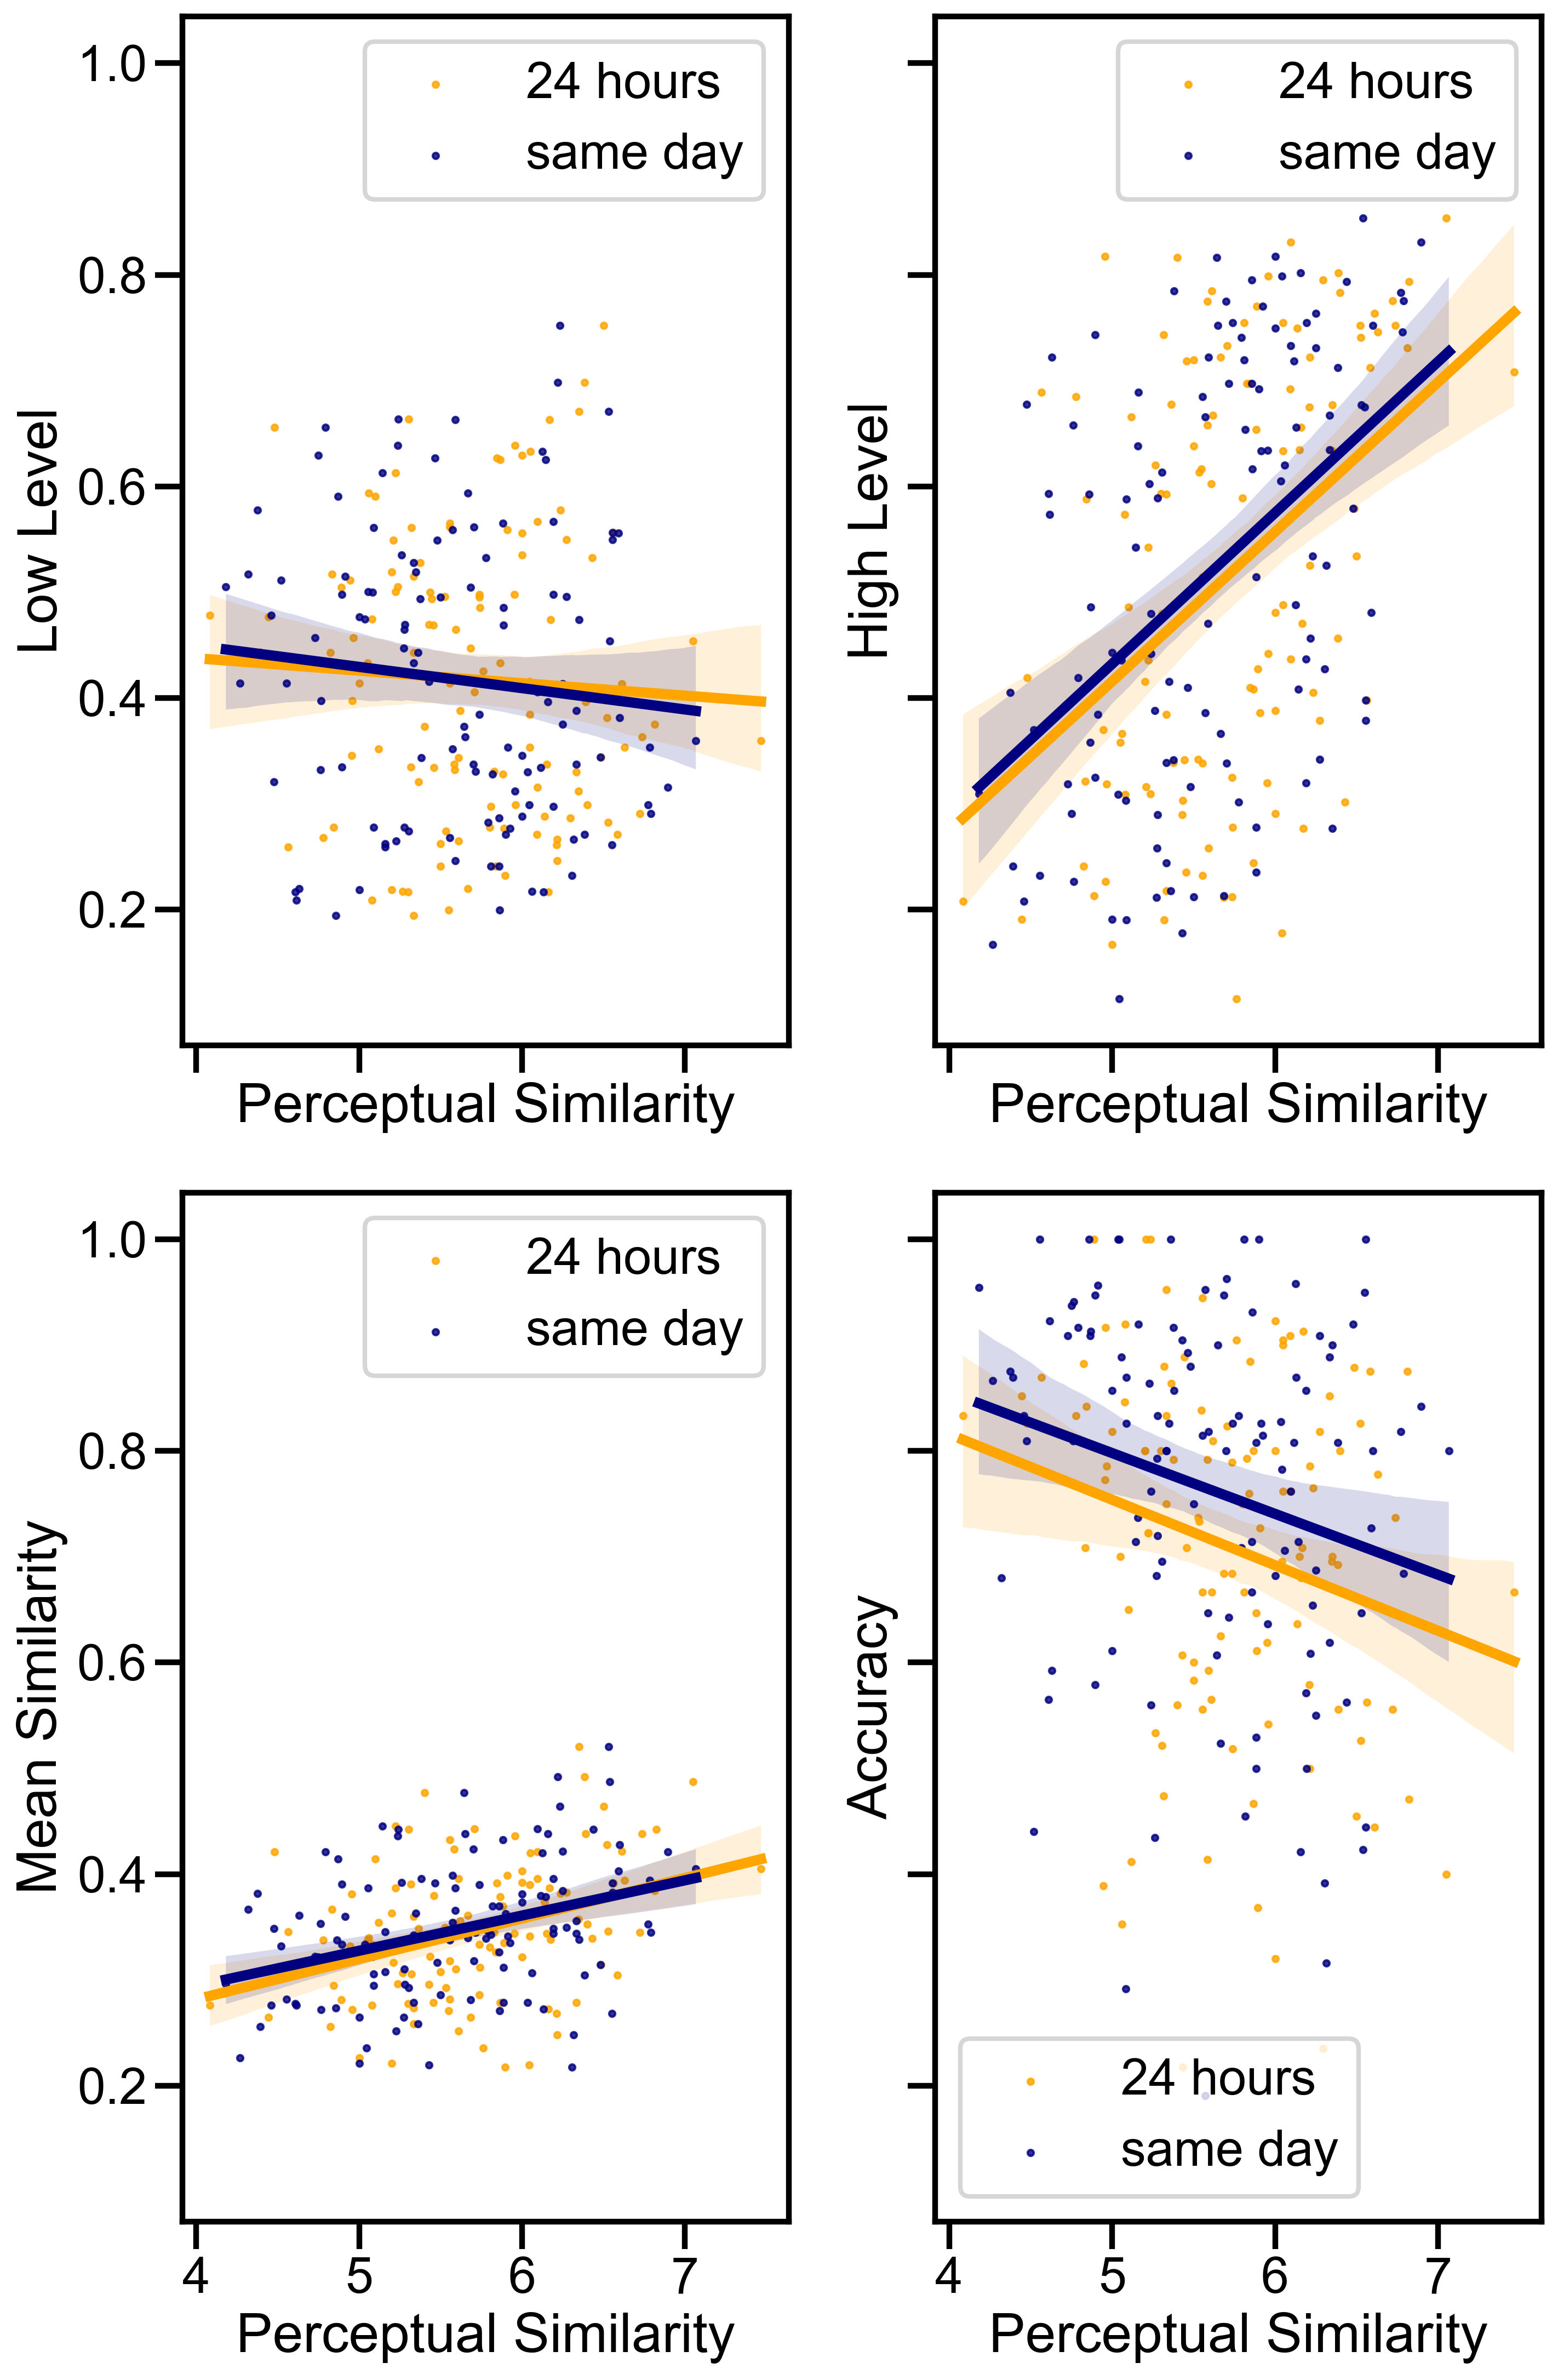

In [135]:
fig,axes=plt.subplots(nrows=2,ncols=2,sharex = True,sharey = True,figsize=(10,15))
axes=axes.ravel()
# low level
slope_24, intercept_24, r_value_24, p_value_24, std_err_24 = stats.linregress(x=correlations_df_24_hours_grouped['bar_2'], y=correlations_df_24_hours_grouped['level_0'])
sns.regplot(data=df_24_hours_grouped,x='bar_2',y='level_0',ax=axes[0],color = 'orange',label = f'24 hours',scatter_kws={'s':7})
#axes[0].set_title(f'perceptual similarity\nand low level similarity')

#rho={r_value_24:.3f}\np={p_value_24:.3f}



slope_day, intercept_day, r_value_day, p_value_day, std_err_day = stats.linregress(x=correlations_df_same_day_grouped['bar_2'], y=correlations_df_same_day_grouped['level_0'])
sns.regplot(data=df_same_day_grouped,x='bar_2',y='level_0',ax=axes[0],color = 'navy',label = f'same day',scatter_kws={'s':7})
axes[0].set_xlabel('Perceptual Similarity')
axes[0].set_ylabel('Low Level')
axes[0].legend()
#\nrho={r_value_day:.3f}\np={p_value_day:.3f}

# high level
slope_24, intercept_24, r_value_24, p_value_24, std_err_24 = stats.linregress(x=correlations_df_24_hours_grouped['bar_2'], y=correlations_df_24_hours_grouped['level_6'])
sns.regplot(data=df_24_hours_grouped,x='bar_2',y='level_6',ax=axes[1],color = 'orange',label = f'24 hours',scatter_kws={'s':7})
#axes[1].set_title(f'perceptual similarity\nand high level similarity')

slope_day, intercept_day, r_value_day, p_value_day, std_err_day = stats.linregress(x=correlations_df_same_day_grouped['bar_2'], y=correlations_df_same_day_grouped['level_6'])
sns.regplot(data=df_same_day_grouped,x='bar_2',y='level_6',ax=axes[1],color = 'navy',label = f'same day',scatter_kws={'s':7})
axes[1].set_xlabel('Perceptual Similarity')
axes[1].set_ylabel('High Level')
axes[1].legend()

# mean similarity
slope_24, intercept_24, r_value_24, p_value_24, std_err_24 = stats.linregress(x=correlations_df_24_hours_grouped['bar_2'], y=correlations_df_24_hours_grouped['mean_sim'])
sns.regplot(data=df_24_hours_grouped,x='bar_2',y='mean_sim',ax=axes[2],color = 'orange',label = f'24 hours',scatter_kws={'s':7})
#axes[2].set_title(f'perceptual similarity\nand low level similarity')

slope_day, intercept_day, r_value_day, p_value_day, std_err_day = stats.linregress(x=correlations_df_same_day_grouped['bar_2'], y=correlations_df_same_day_grouped['mean_sim'])
sns.regplot(data=df_same_day_grouped,x='bar_2',y='mean_sim',ax=axes[2],color = 'navy',label = f'same day',scatter_kws={'s':7})
axes[2].set_xlabel('Perceptual Similarity')
axes[2].set_ylabel('Mean Similarity')
axes[2].legend()

# corr
slope_24, intercept_24, r_value_24, p_value_24, std_err_24 = stats.linregress(x=correlations_df_24_hours_grouped['bar_2'], y=correlations_df_24_hours_grouped['corr'])
sns.regplot(data=df_24_hours_grouped,x='bar_2',y='corr',ax=axes[3],color = 'orange',label = f'24 hours',scatter_kws={'s':7})
#axes[3].set_title(f'perceptual similarity\nand accuracy')

slope_day, intercept_day, r_value_day, p_value_day, std_err_day = stats.linregress(x=correlations_df_same_day_grouped['bar_2'], y=correlations_df_same_day_grouped['corr'])
sns.regplot(data=df_same_day_grouped,x='bar_2',y='corr',ax=axes[3],color = 'navy',label = f'same day',scatter_kws={'s':7})
axes[3].set_xlabel('Perceptual Similarity')
axes[3].set_ylabel('Accuracy')
axes[3].legend()
fig.tight_layout()

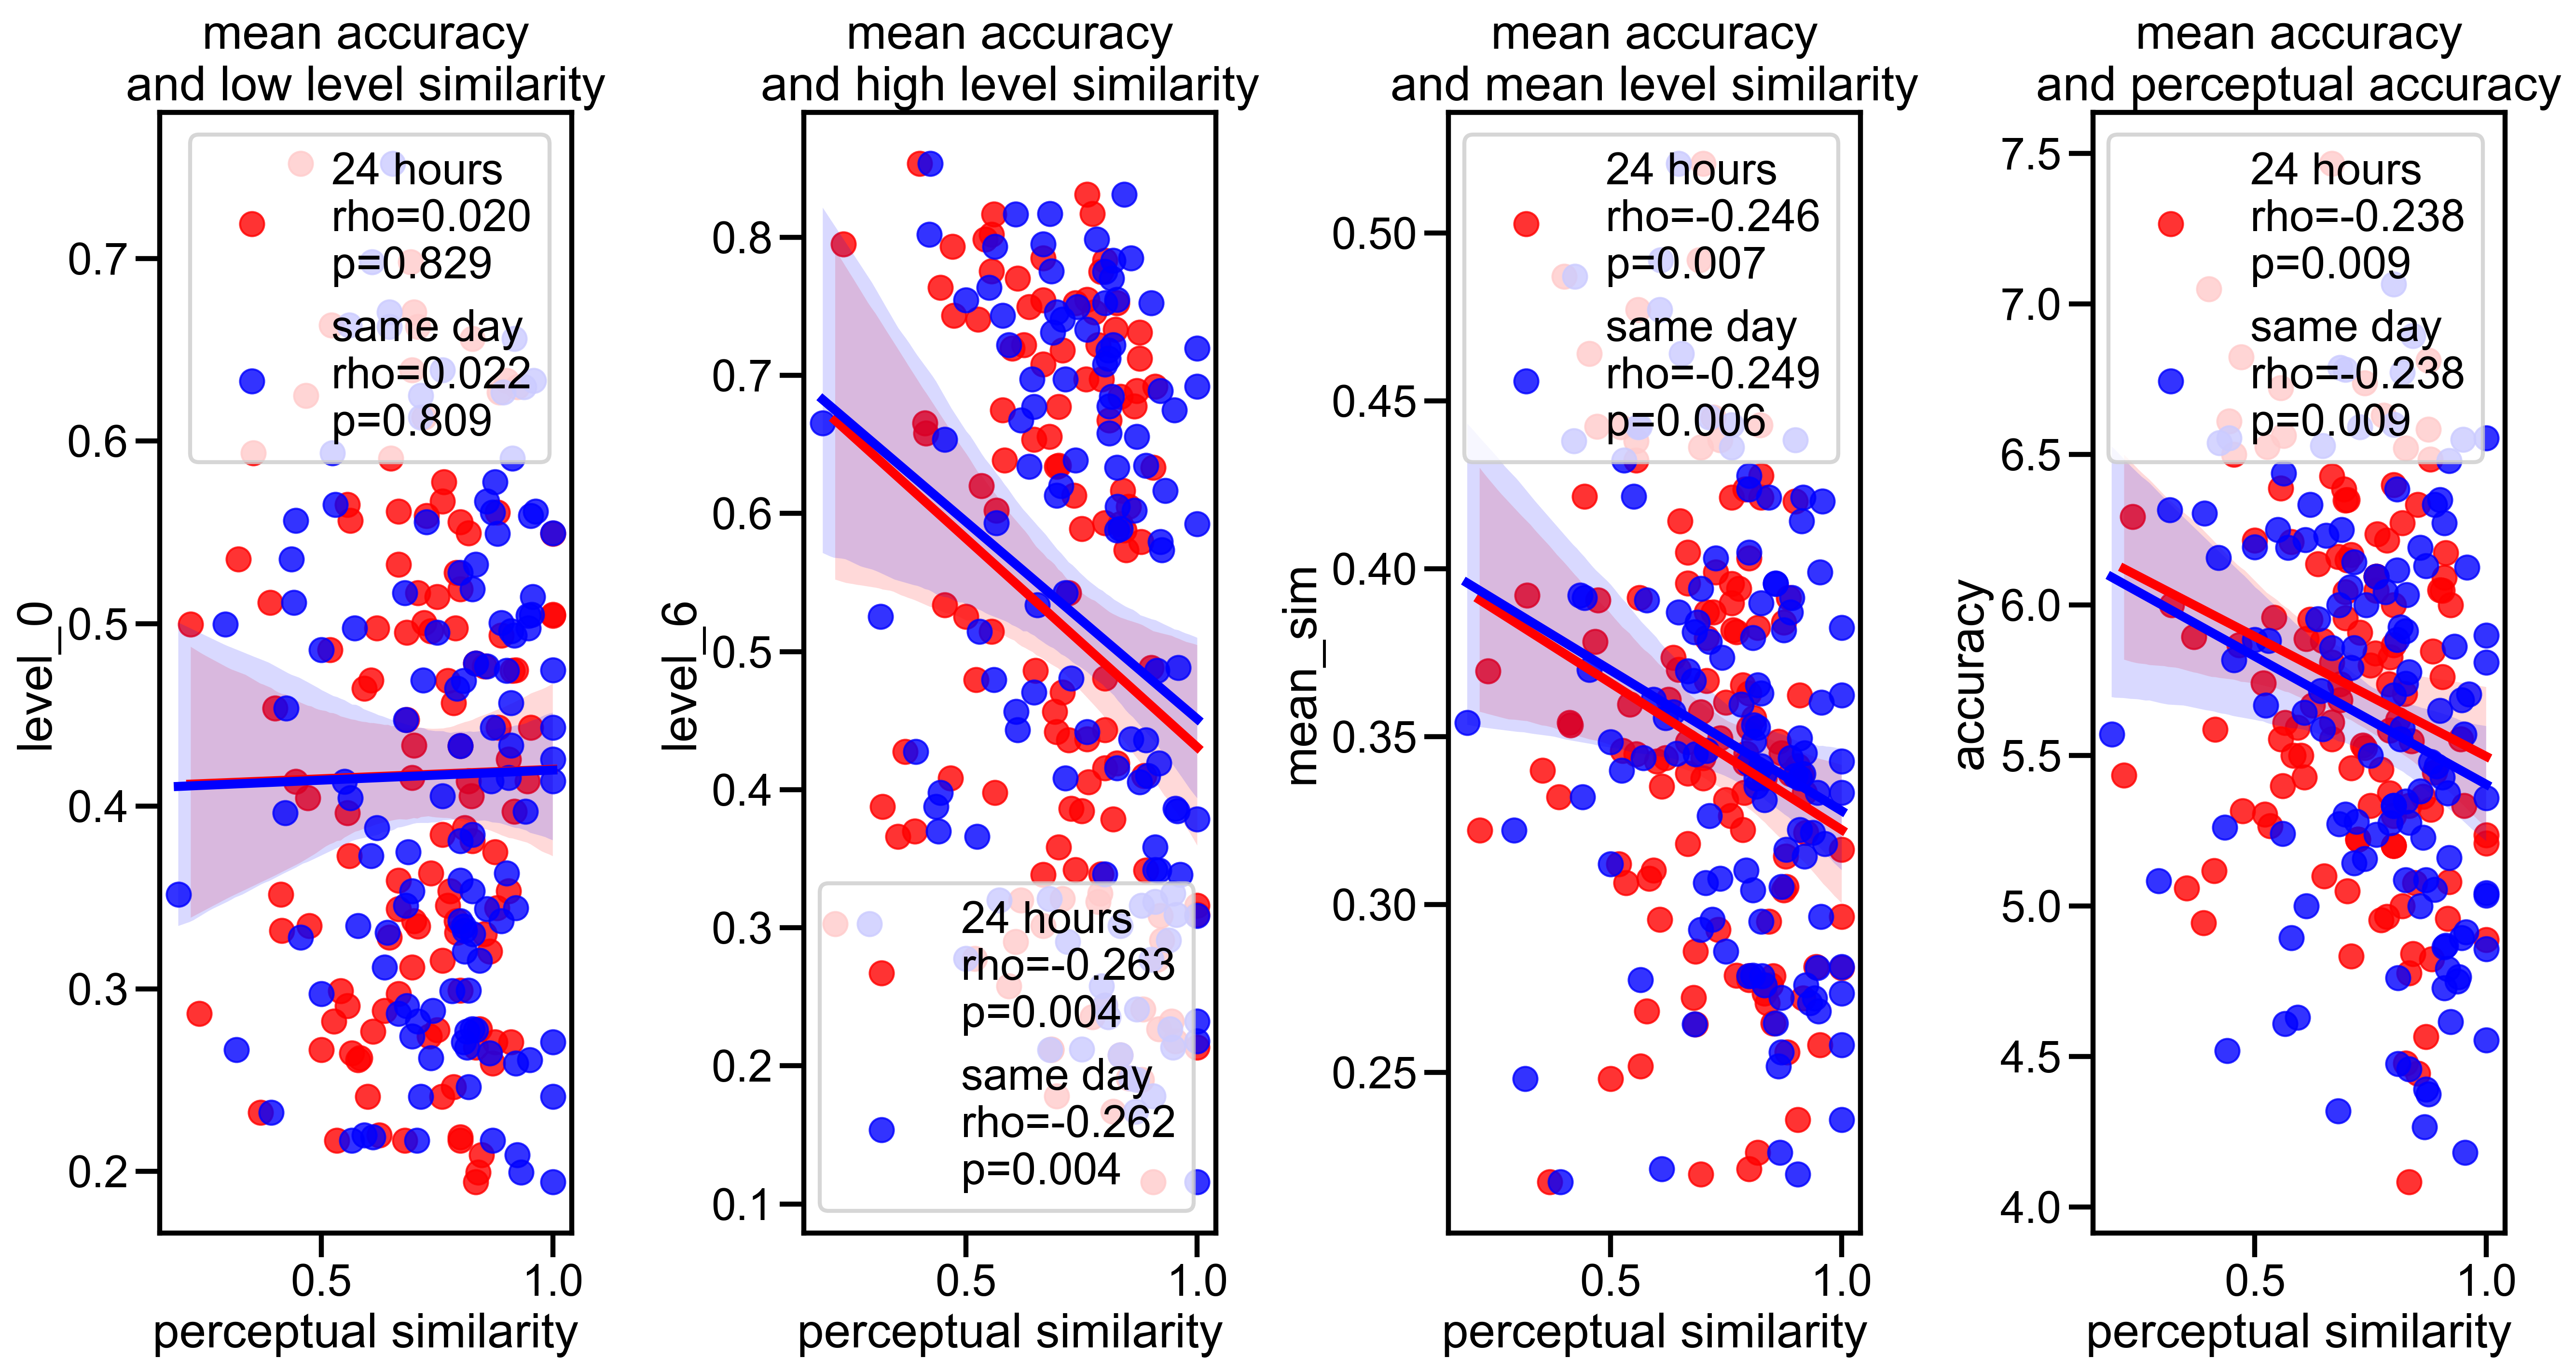

In [137]:
fig,axes=plt.subplots(nrows=1,ncols=4,figsize=(18,10))
# low level
slope_24, intercept_24, r_value_24, p_value_24, std_err_24 = stats.linregress(x=correlations_df_24_hours_grouped['corr'], y=correlations_df_24_hours_grouped['level_0'])
sns.regplot(data=df_24_hours_grouped,x='corr',y='level_0',ax=axes[0],color = 'red',label = f'24 hours\nrho={r_value_24:.3f}\np={p_value_24:.3f}')
axes[0].set_title(f'mean accuracy\nand low level similarity')

slope_day, intercept_day, r_value_day, p_value_day, std_err_day = stats.linregress(x=correlations_df_same_day_grouped['corr'], y=correlations_df_same_day_grouped['level_0'])
sns.regplot(data=df_same_day_grouped,x='corr',y='level_0',ax=axes[0],color = 'blue',label = f'same day\nrho={r_value_day:.3f}\np={p_value_day:.3f}')
axes[0].set_xlabel('perceptual similarity')
axes[0].legend()

# high level
slope_24, intercept_24, r_value_24, p_value_24, std_err_24 = stats.linregress(x=correlations_df_24_hours_grouped['corr'], y=correlations_df_24_hours_grouped['level_6'])
sns.regplot(data=df_24_hours_grouped,x='corr',y='level_6',ax=axes[1],color = 'red',label = f'24 hours\nrho={r_value_24:.3f}\np={p_value_24:.3f}')
axes[1].set_title(f'mean accuracy\nand high level similarity')

slope_day, intercept_day, r_value_day, p_value_day, std_err_day = stats.linregress(x=correlations_df_same_day_grouped['corr'], y=correlations_df_same_day_grouped['level_6'])
sns.regplot(data=df_same_day_grouped,x='corr',y='level_6',ax=axes[1],color = 'blue',label = f'same day\nrho={r_value_day:.3f}\np={p_value_day:.3f}')
axes[1].set_xlabel('perceptual similarity')
axes[1].legend()

# mean similarity
slope_24, intercept_24, r_value_24, p_value_24, std_err_24 = stats.linregress(x=correlations_df_24_hours_grouped['corr'], y=correlations_df_24_hours_grouped['mean_sim'])
sns.regplot(data=df_24_hours_grouped,x='corr',y='mean_sim',ax=axes[2],color = 'red',label = f'24 hours\nrho={r_value_24:.3f}\np={p_value_24:.3f}')
axes[2].set_title(f'mean accuracy\nand mean level similarity')

slope_day, intercept_day, r_value_day, p_value_day, std_err_day = stats.linregress(x=correlations_df_same_day_grouped['corr'], y=correlations_df_same_day_grouped['mean_sim'])
sns.regplot(data=df_same_day_grouped,x='corr',y='mean_sim',ax=axes[2],color = 'blue',label = f'same day\nrho={r_value_day:.3f}\np={p_value_day:.3f}')
axes[2].set_xlabel('perceptual similarity')
axes[2].legend()

# corr
slope_24, intercept_24, r_value_24, p_value_24, std_err_24 = stats.linregress(x=correlations_df_24_hours_grouped['corr'], y=correlations_df_24_hours_grouped['bar_2'])
sns.regplot(data=df_24_hours_grouped,x='corr',y='bar_2',ax=axes[3],color = 'red',label = f'24 hours\nrho={r_value_24:.3f}\np={p_value_24:.3f}')
axes[3].set_title(f'mean accuracy\nand perceptual accuracy')

slope_day, intercept_day, r_value_day, p_value_day, std_err_day = stats.linregress(x=correlations_df_same_day_grouped['corr'], y=correlations_df_same_day_grouped['bar_2'])
sns.regplot(data=df_same_day_grouped,x='corr',y='bar_2',ax=axes[3],color = 'blue',label = f'same day\nrho={r_value_day:.3f}\np={p_value_day:.3f}')
axes[3].set_xlabel('perceptual similarity')
axes[3].set_ylabel('accuracy')
axes[3].legend()
fig.tight_layout()

In [138]:
accuracy_df_temp=accuracy_df.copy()
accuracy_df_temp[accuracy_df_temp['time_gap']=='pilot_24_hours']

worker_ID        time_gap                     layer      value   
44   A27KTNOX292J1I  pilot_24_hours  testing_layer_1_accuracy  66.666667  \
45   A3PIJBZIF34XR2  pilot_24_hours  testing_layer_1_accuracy  66.666667   
46   A2APG8MSLJ6G2K  pilot_24_hours  testing_layer_1_accuracy  86.666667   
47    A8C3WNWRBWUXO  pilot_24_hours  testing_layer_1_accuracy  76.666667   
48    A9HQ3E0F2AGVO  pilot_24_hours  testing_layer_1_accuracy  63.333333   
..              ...             ...                       ...        ...   
163  A2F48NO7AD9VKK  pilot_24_hours  testing_layer_3_accuracy  80.000000   
164  A19AYB3M3IIP51  pilot_24_hours  testing_layer_3_accuracy  70.000000   
165   A1BQLX0A4W8A8  pilot_24_hours  testing_layer_3_accuracy  53.333333   
166  A1ABRVTR49OA73  pilot_24_hours  testing_layer_3_accuracy  53.333333   
167  A2J9NFY45NKR2N  pilot_24_hours  testing_layer_3_accuracy  73.333333   

                                 factor_comb  
44   testing_layer_1_accuracy_pilot_24_hours  
45   testing_layer_1_accuracy_pilot_24_hours  
46   testing_layer_1_accuracy_pilot_24_hours  
47   testing_layer_1_accuracy_pilot_24_hours  
48   testing_layer_1_accuracy_pilot_24_hours  
..                                       ...  
163  testing_layer_3_accuracy_pilot_24_hours  
164  testing_layer_3_accuracy_pilot_24_hours  
165  testing_layer_3_accuracy_pilot_24_hours  
166  testing_layer_3_accuracy_pilot_24_hours  
167  testing_layer_3_accuracy_pilot_24_hours  

[80 rows x 5 columns]

In [139]:
#add the similarity columns to the long data format:
 
if (PATH_TO_EXPERIMENT / 'long_format_test_with_similarity.csv').exists():
    print('loading a pre existing long dataframe with similarity values\nlocated at:',PATH_TO_EXPERIMENT / 'long_format_test_with_similarity.csv')
    all_valid_test_df_long_format=pd.read_csv(PATH_TO_EXPERIMENT / 'long_format_test_with_similarity.csv')
else: 
    print('calculating a long dataframe with similarity values')
    sim_levels_colnames=[colname for colname in similarity_df.columns if 'level_' in colname]

    #get all unique pairs: 
    all_pairs=[set([img1,img2]) for img1,img2 in all_valid_test_df_long_format[['image1','image2']].values]
    all_unique_pairs=[]
    for pair in all_pairs:
        if pair not in all_unique_pairs:
            all_unique_pairs.append(pair)

    print(f'running on {len(all_unique_pairs)} options of the displayed image pairs: extracting thier similarity level across all layers')

    missing_similarity_pairs=[]
    for img1,img2 in all_unique_pairs:
        #get all the instances from the long format data that contains this pair: 
        sim_vals=similarity_df.loc[((similarity_df['image1']==img1) & (similarity_df['image2']==img2)) 
            | ((similarity_df['image1']==img2) & (similarity_df['image2']==img1)),sim_levels_colnames]

        if len(sim_vals)==0: #if the images are not in the similarity df (could happen if using a newer version of the similary df where some images were filtered out)
            missing_similarity_pairs.append((img1,img2))
        else: 
            all_valid_test_df_long_format.loc[((all_valid_test_df_long_format['image1']==img1) & (all_valid_test_df_long_format['image2']==img2)) 
                | ((all_valid_test_df_long_format['image1']==img2) & (all_valid_test_df_long_format['image2']==img1)),sim_levels_colnames]=sim_vals.values[0,:].tolist()

    print('the following pairs were missing from the large similarity df:\n',missing_similarity_pairs)
    #save
    all_valid_test_df_long_format.to_csv(PATH_TO_EXPERIMENT / 'long_format_test_with_similarity.csv',index=False)   

calculating a long dataframe with similarity values


NameError: name 'similarity_df' is not defined

In [ ]:
all_valid_test_df_long_format.sample(5)

Unnamed: 0  layer correct test_test_response.keys  \
338          398    2.0    left                    left   
2217         837    1.0   right                    left   
539         1019    1.0   right                   right   
313          373    3.0    left                    left   
2216         836    2.0   right                    left   

      test_test_response.corr  test_test_response.rt  trials_2.thisRepN  \
338                       1.0                 3.4051                0.0   
2217                      0.0                 2.3486                0.0   
539                       1.0                 1.1171                0.0   
313                       1.0                 1.4264                0.0   
2216                      0.0                 1.8141                0.0   

      trials_2.thisTrialN  trials_2.thisN  trials_2.thisIndex  ...  \
338                  38.0            38.0                38.0  ...   
2217                 57.0            57.0                57.0  ...   
539                  59.0            59.0                59.0  ...   
313                  13.0            13.0                13.0  ...   
2216                 56.0            56.0                56.0  ...   

                               image2         subject        time_gap  \
338          CAATINGA_CACHOLOTE_4.jpg  A1SNC8UL8YFRH5  pilot_24_hours   
2217                 LITTLE_AUK_5.jpg  A2GYZK79RQAH4I  pilot_same_day   
539   RUBY_THROATED_HUMMINGBIRD_1.jpg  A3CH1Z6J9R38G9  pilot_24_hours   
313                     TOUCHAN_4.jpg  A1SNC8UL8YFRH5  pilot_24_hours   
2216                    PEACOCK_3.jpg  A2GYZK79RQAH4I  pilot_same_day   

       level_0   level_1   level_2   level_3   level_4   level_5   level_6  
338   0.322354  0.312901  0.240816  0.275784  0.376117  0.373875  0.355102  
2217  0.389461  0.319725  0.213837  0.135504  0.089756  0.158892  0.165825  
539   0.666807  0.347403  0.211069  0.150372  0.226233  0.358464  0.337651  
313   0.265838  0.266390  0.198450  0.188729  0.239548  0.395097  0.454827  
2216  0.338956  0.325276  0.230851  0.205892  0.197619  0.202916  0.174122  

[5 rows x 22 columns]

In [ ]:
all_valid_test_df_long_format.rename(columns={'test_test_response.corr':'is_correct','test_test_response.rt':'rt','trials_2.thisTrialN':'trial_num'},inplace=True)
all_subjects_test_long_format_df.rename(columns={'test_test_response.corr':'is_correct','test_test_response.rt':'rt','trials_2.thisTrialN':'trial_num'},inplace=True)
#create grouped sim values: 
all_valid_test_df_long_format['sim_layer_1']=all_valid_test_df_long_format['level_0']
all_valid_test_df_long_format['sim_layer_2']=all_valid_test_df_long_format['level_3']
all_valid_test_df_long_format['sim_layer_3']=all_valid_test_df_long_format['level_6']


In [ ]:
all_valid_test_df_long_format['time_gap_numeric']=all_valid_test_df_long_format['time_gap'].map({'pilot_same_day':'0','pilot_24_hours':'1','pilot_one_week':'2'})
all_valid_test_df_long_format.dropna(inplace=True)
print('valid long format count: ')
print(all_valid_test_df_long_format['time_gap_numeric'].value_counts())

all_subjects_test_long_format_df['time_gap_numeric']=all_subjects_test_long_format_df['time_gap'].map({'pilot_same_day':'0','pilot_24_hours':'1','pilot_one_week':'2'})
all_subjects_test_long_format_df.dropna(inplace=True)
print('all long format')
print(all_subjects_test_long_format_df['time_gap_numeric'].value_counts())



valid long format count: 
0    1080
2     840
1     720
Name: time_gap_numeric, dtype: int64
all long format
2    2700
0    1620
1    1560
Name: time_gap_numeric, dtype: int64


In [ ]:
all_valid_test_df_long_format.columns

Index(['Unnamed: 0', 'layer', 'correct', 'test_test_response.keys',
       'is_correct', 'rt', 'trials_2.thisRepN', 'trial_num', 'trials_2.thisN',
       'trials_2.thisIndex', 'trials_2.ran', 'image1', 'image2', 'subject',
       'time_gap', 'level_0', 'level_1', 'level_2', 'level_3', 'level_4',
       'level_5', 'level_6', 'sim_layer_1', 'sim_layer_2', 'sim_layer_3',
       'time_gap_numeric'],
      dtype='object')

In [ ]:
#test: multiply the sample by 3: 
tempdf1=all_valid_test_df_long_format.copy()

tempdf2=all_valid_test_df_long_format.copy()
tempdf2['subject']=[str(ind)+'_2' for ind in all_valid_test_df_long_format['subject']]
tempdf2.reset_index(inplace=True)
tempdf3=all_valid_test_df_long_format.copy()
tempdf3['subject']=[str(ind)+'_3' for ind in all_valid_test_df_long_format['subject']]
tempdf3.reset_index(inplace=True)

fake_3_times_original=pd.concat([tempdf1,tempdf2,tempdf3],axis=0)
fake_3_times_original.head(5)

#test the full design in anova (but with the faked x3 data sample)
print('full design')
pg.mixed_anova(dv='is_correct', between='time_gap', within='layer', subject='subject', data=fake_3_times_original)


full design


Source        SS  DF1  DF2        MS          F         p-unc  \
0     time_gap  1.212230    2  129  0.606115  31.518561  7.156352e-12   
1        layer  0.212159    2  258  0.106080   8.995347  1.673244e-04   
2  Interaction  0.050321    4  258  0.012580   1.066783  3.734084e-01   

        np2       eps  
0  0.328255       NaN  
1  0.065186  0.974619  
2  0.016270       NaN

In [ ]:
print('full design')
pg.mixed_anova(dv='is_correct', between='time_gap', within='layer', subject='subject', data=all_valid_test_df_long_format[~(all_valid_test_df_long_format['subject']=='A1P2XKONWAOXHP')])

full design


Source        SS  DF1  DF2        MS         F     p-unc       np2  \
0     time_gap  0.328937    2   40  0.164469  8.412378  0.000892  0.296081   
1        layer  0.075155    2   80  0.037578  3.292296  0.042264  0.076048   
2  Interaction  0.031743    4   80  0.007936  0.695281  0.597414  0.033596   

        eps  
0       NaN  
1  0.956917  
2       NaN

In [ ]:
print('design - no mid level representation')
pg.mixed_anova(dv='is_correct', between='time_gap', within='layer', subject='subject', data=all_valid_test_df_long_format[~(all_valid_test_df_long_format['layer']==2.0)]
)

design - no mid level representation


Source        SS  DF1  DF2        MS          F     p-unc       np2  \
0     time_gap  0.276295    2   41  0.138148  11.555658  0.000105  0.360487   
1        layer  0.062756    1   41  0.062756   4.457871  0.040881  0.098066   
2  Interaction  0.016317    2   41  0.008158   0.579532  0.564682  0.027493   

   eps  
0  NaN  
1  1.0  
2  NaN

In [ ]:
print('design - no 24h representation')
pg.mixed_anova(dv='is_correct', between='time_gap', within='layer', subject='subject', data=all_valid_test_df_long_format[~(all_valid_test_df_long_format['time_gap']=='pilot_24_hours')]
)

design - no 24h representation


Source        SS  DF1  DF2        MS          F     p-unc       np2  \
0     time_gap  0.275913    1   30  0.275913  13.219628  0.001027  0.305871   
1        layer  0.066719    2   60  0.033359   2.565627  0.085281  0.078783   
2  Interaction  0.011469    2   60  0.005735   0.441036  0.645438  0.014488   

        eps  
0       NaN  
1  0.901453  
2       NaN

In [ ]:
print('design -no layer 2, no 24h representation')
pg.mixed_anova(dv='is_correct', between='time_gap', within='layer', subject='subject', data=all_valid_test_df_long_format[~(all_valid_test_df_long_format['layer']==2.0) & ~(all_valid_test_df_long_format['time_gap']=='pilot_24_hours')]
)

design -no layer 2, no 24h representation


Source        SS  DF1  DF2        MS          F     p-unc       np2  \
0     time_gap  0.183492    1   30  0.183492  14.620573  0.000618  0.327664   
1        layer  0.062500    1   30  0.062500   3.780000  0.061299  0.111901   
2  Interaction  0.011468    1   30  0.011468   0.693600  0.411524  0.022598   

   eps  
0  NaN  
1  1.0  
2  NaN

In [ ]:
#this section runs a logistic regression seperately for each time scale, it predicts the correctness of the image pair during test, according to its similarity across the 3 defined levels: 
from statsmodels.genmod.bayes_mixed_glm import BinomialBayesMixedGLM

for cur_timegap in ['pilot_same_day','pilot_24_hours','pilot_one_week']:
    random = {"a": '0 + C(subject)'}
    model = BinomialBayesMixedGLM.from_formula(
                'is_correct ~ sim_layer_1 + sim_layer_2 + sim_layer_3', random, all_valid_test_df_long_format[all_valid_test_df_long_format['time_gap']==cur_timegap])
    result = model.fit_vb()
    print(f'time game: {cur_timegap}',result.summary())




time game: pilot_same_day                 Binomial Mixed GLM Results
            Type Post. Mean Post. SD   SD  SD (LB) SD (UB)
----------------------------------------------------------
Intercept      M     1.9624   0.0762                      
sim_layer_1    M    -0.5651   0.2139                      
sim_layer_2    M    -0.7293   0.3928                      
sim_layer_3    M    -0.8517   0.2433                      
a              V    -0.6829   0.1675 0.505   0.361   0.706
Parameter types are mean structure (M) and variance
structure (V)
Variance parameters are modeled as log standard deviations
time game: pilot_24_hours                 Binomial Mixed GLM Results
            Type Post. Mean Post. SD   SD  SD (LB) SD (UB)
----------------------------------------------------------
Intercept      M     2.6483   0.0973                      
sim_layer_1    M    -0.7955   0.2747                      
sim_layer_2    M    -2.3229   0.4887                      
sim_layer_3    M    -1.5219  

In [ ]:
random = {"a": '0 + C(subject)'}
model = BinomialBayesMixedGLM.from_formula(
            'is_correct ~ time_gap_numeric*sim_layer_1 + time_gap_numeric*sim_layer_2 + time_gap_numeric*sim_layer_3', random, all_valid_test_df_long_format)
result = model.fit_vb()
print(result.summary())

                           Binomial Mixed GLM Results
                                  Type Post. Mean Post. SD   SD  SD (LB) SD (UB)
--------------------------------------------------------------------------------
Intercept                            M     2.1772   0.0469                      
time_gap_numeric[T.1]                M     0.8376   0.0975                      
time_gap_numeric[T.2]                M    -0.2831   0.0753                      
sim_layer_1                          M    -0.7406   0.1328                      
time_gap_numeric[T.1]:sim_layer_1    M    -0.4236   0.2742                      
time_gap_numeric[T.2]:sim_layer_1    M    -0.1197   0.2144                      
sim_layer_2                          M    -1.4080   0.2423                      
time_gap_numeric[T.1]:sim_layer_2    M    -1.7020   0.4866                      
time_gap_numeric[T.2]:sim_layer_2    M    -0.4049   0.3867                      
sim_layer_3                          M    -1.0363   0.1

In [ ]:
all_valid_test_df_long_format.groupby('layer').aggregate({'sim_layer_1':['mean','std'],'sim_layer_2':['mean','std'],'sim_layer_3':['mean','std']})

sim_layer_1           sim_layer_2           sim_layer_3          
             mean       std        mean       std        mean       std
layer                                                                  
1.0      0.456909  0.101192    0.137671  0.027919    0.170112  0.075835
2.0      0.294381  0.050582    0.246680  0.052566    0.199468  0.065194
3.0      0.248484  0.032913    0.154855  0.013599    0.443741  0.042521

In [ ]:
all_valid_test_df_long_format['overallsim']=all_valid_test_df_long_format[['level_0','level_1','level_2','level_3'
,'level_4','level_5','level_6']].mean(axis=1)

all_valid_test_df_long_format.groupby('layer').aggregate({'overallsim':['mean','std']})

overallsim          
            mean       std
layer                     
1.0     0.228618  0.043781
2.0     0.252914  0.043396
3.0     0.276197  0.022112

In [ ]:
random = {"a": '0 + C(subject)'}
model = BinomialBayesMixedGLM.from_formula(
            'is_correct ~ time_gap_numeric*sim_layer_1 + time_gap_numeric*sim_layer_2 + time_gap_numeric*sim_layer_3', random, all_valid_test_df_long_format)
result = model.fit_vb()
print(result.summary())

                           Binomial Mixed GLM Results
                                  Type Post. Mean Post. SD   SD  SD (LB) SD (UB)
--------------------------------------------------------------------------------
Intercept                            M     2.1772   0.0469                      
time_gap_numeric[T.1]                M     0.8376   0.0975                      
time_gap_numeric[T.2]                M    -0.2831   0.0753                      
sim_layer_1                          M    -0.7406   0.1328                      
time_gap_numeric[T.1]:sim_layer_1    M    -0.4236   0.2742                      
time_gap_numeric[T.2]:sim_layer_1    M    -0.1197   0.2144                      
sim_layer_2                          M    -1.4080   0.2423                      
time_gap_numeric[T.1]:sim_layer_2    M    -1.7020   0.4866                      
time_gap_numeric[T.2]:sim_layer_2    M    -0.4049   0.3867                      
sim_layer_3                          M    -1.0363   0.1

In [ ]:
all_valid_test_df_long_format_with_dummies=pd.concat([all_valid_test_df_long_format,pd.get_dummies(all_valid_test_df_long_format['time_gap_numeric'],prefix='time_gap')],axis=1)
all_valid_test_df_long_format_with_dummies


Unnamed: 0  layer correct test_test_response.keys  is_correct      rt  \
0              0    1.0    left                    left         1.0  6.1472   
1              1    3.0    left                    left         1.0  1.8693   
2              2    1.0   right                   right         1.0  2.9381   
3              3    2.0    left                    left         1.0  3.6978   
4              4    3.0    left                   right         0.0  1.7443   
...          ...    ...     ...                     ...         ...     ...   
2635        1615    3.0   right                    left         0.0  1.5044   
2636        1616    1.0   right                    left         0.0  2.7726   
2637        1617    1.0   right                    left         0.0  1.8330   
2638        1618    1.0   right                    left         0.0  5.4716   
2639        1619    2.0   right                    left         0.0  5.6031   

      trials_2.thisRepN  trial_num  trials_2.thisN  trials_2.thisIndex  ...  \
0                   0.0        0.0             0.0                 0.0  ...   
1                   0.0        1.0             1.0                 1.0  ...   
2                   0.0        2.0             2.0                 2.0  ...   
3                   0.0        3.0             3.0                 3.0  ...   
4                   0.0        4.0             4.0                 4.0  ...   
...                 ...        ...             ...                 ...  ...   
2635                0.0       55.0            55.0                55.0  ...   
2636                0.0       56.0            56.0                56.0  ...   
2637                0.0       57.0            57.0                57.0  ...   
2638                0.0       58.0            58.0                58.0  ...   
2639                0.0       59.0            59.0                59.0  ...   

       level_5   level_6 sim_layer_1 sim_layer_2 sim_layer_3  \
0     0.146254  0.166604    0.432315    0.119700    0.166604   
1     0.460697  0.479103    0.252797    0.147892    0.479103   
2     0.145194  0.143269    0.371700    0.116030    0.143269   
3     0.120520  0.105852    0.235955    0.157323    0.105852   
4     0.409940  0.474144    0.267362    0.145214    0.474144   
...        ...       ...         ...         ...         ...   
2635  0.283210  0.317219    0.286303    0.164000    0.317219   
2636  0.169028  0.129769    0.352470    0.127925    0.129769   
2637  0.187125  0.156412    0.366373    0.135105    0.156412   
2638  0.181370  0.207854    0.596399    0.112743    0.207854   
2639  0.167098  0.174805    0.254056    0.182273    0.174805   

      time_gap_numeric  overallsim  time_gap_0  time_gap_1  time_gap_2  
0                    1    0.216330           0           1           0  
1                    1    0.297034           0           1           0  
2                    1    0.190311           0           1           0  
3                    1    0.185062           0           1           0  
4                    1    0.269322           0           1           0  
...                ...         ...         ...         ...         ...  
2635                 0    0.250919           1           0           0  
2636                 0    0.192772           1           0           0  
2637                 0    0.202173           1           0           0  
2638                 0    0.238495           1           0           0  
2639                 0    0.199162           1           0           0  

[2640 rows x 30 columns]

In [ ]:
random = {"subject": '0 + C(subject)'}
model = BinomialBayesMixedGLM.from_formula(
            'is_correct ~ overallsim * time_gap_2' ,random,data=all_valid_test_df_long_format_with_dummies[~(all_valid_test_df_long_format_with_dummies['time_gap']=='pilot_24_hours')])
result = model.fit_vb()
print(result.summary())
print(model.exog_names)

df_for_prediction=pd.DataFrame(columns=model.exog_names)
df_for_prediction[model.exog_names]=model.exog


                     Binomial Mixed GLM Results
                      Type Post. Mean Post. SD   SD  SD (LB) SD (UB)
--------------------------------------------------------------------
Intercept                M     1.9786   0.0533                      
overallsim               M    -2.3366   0.2051                      
time_gap_2               M    -0.1138   0.0750                      
overallsim:time_gap_2    M    -1.8643   0.2875                      
subject                  V    -0.9753   0.1259 0.377   0.293   0.485
Parameter types are mean structure (M) and variance structure (V)
Variance parameters are modeled as log standard deviations
['Intercept', 'overallsim', 'time_gap_2', 'overallsim:time_gap_2']


In [ ]:
#show the correlations for within conditions (sepertastely for each between level)
for groupind in range(3):
    print(list(all_valid_subjects.groupby('time_gap'))[groupind][0])
    display(list(all_valid_subjects.groupby('time_gap'))[groupind][1][['testing_layer_1_accuracy','testing_layer_2_accuracy','testing_layer_3_accuracy']].corr())

pilot_24_hours


testing_layer_1_accuracy  testing_layer_2_accuracy  \
testing_layer_1_accuracy                  1.000000                  0.342599   
testing_layer_2_accuracy                  0.342599                  1.000000   
testing_layer_3_accuracy                  0.590432                  0.595067   

                          testing_layer_3_accuracy  
testing_layer_1_accuracy                  0.590432  
testing_layer_2_accuracy                  0.595067  
testing_layer_3_accuracy                  1.000000

pilot_one_week


testing_layer_1_accuracy  testing_layer_2_accuracy  \
testing_layer_1_accuracy                  1.000000                  0.531222   
testing_layer_2_accuracy                  0.531222                  1.000000   
testing_layer_3_accuracy                  0.216644                  0.448674   

                          testing_layer_3_accuracy  
testing_layer_1_accuracy                  0.216644  
testing_layer_2_accuracy                  0.448674  
testing_layer_3_accuracy                  1.000000

pilot_same_day


testing_layer_1_accuracy  testing_layer_2_accuracy  \
testing_layer_1_accuracy                  1.000000                  0.552098   
testing_layer_2_accuracy                  0.552098                  1.000000   
testing_layer_3_accuracy                  0.256270                  0.592233   

                          testing_layer_3_accuracy  
testing_layer_1_accuracy                  0.256270  
testing_layer_2_accuracy                  0.592233  
testing_layer_3_accuracy                  1.000000